# Acquiring the data

In this stage, the data and the required libraries will be imported. 

In [2]:
# Importing the required libraries
import pandas as pd
pd.set_option('display.max_columns', 50) # Display up to 50 columns at a time
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import cm
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12,5
import glob # To read all csv files in the directory
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, f1_score, precision_recall_fscore_support
import itertools
import time

In [3]:
!conda install -c anaconda seaborn -y

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\ProgramData\Anaconda3

  added / updated specs:
    - seaborn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-4.8.4                |           py37_0         3.1 MB  anaconda
    ------------------------------------------------------------
                                           Total:         3.1 MB

The following packages will be UPDATED:

  conda                      pkgs/main::conda-4.7.12-py37_0 --> anaconda::conda-4.8.4-py37_0

The following packages will be SUPERSEDED by a higher-priority channel:

  seaborn                                         pkgs/main --> anaconda




conda-4.8.4          | 3.1 MB    |            |   0% 
conda-4.8.4          | 3.1 MB    | 3          |   3% 
conda-4.8.4          | 3.1 MB    | #7         |  18% 
conda-4.8.4          | 3.1 MB    | ###2       |  32



==> WARNING: A newer version of conda exists. <==
  current version: 4.7.12
  latest version: 4.8.4

Please update conda by running

    $ conda update -n base -c defaults conda



EnvironmentNotWritableError: The current user does not have write permissions to the target environment.
  environment location: C:\ProgramData\Anaconda3




The Kickstarter data covering one year worth of data (June 2019 to June 2020) collected from https://webrobots.io/kickstarter-datasets/ is stored in 78 separate csv files. The code below creates a list of all csv files beginning with 'Kickstarter' and integrates them into one dataframe:

In [4]:
df = pd.concat([pd.read_csv(f) for f in glob.glob('Kickstarter*.csv')], ignore_index = True)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [5]:
df.head(3)

,backers_count,blurb,category,converted_pledged_amount,country,country_displayable_name,created_at,creator,currency,currency_symbol,currency_trailing_code,current_currency,deadline,disable_communication,friends,fx_rate,goal,id,is_backing,is_starrable,is_starred,last_update_published_at,launched_at,location,name,permissions,photo,pledged,profile,slug,source_url,spotlight,staff_pick,state,state_changed_at,static_usd_rate,unread_messages_count,unseen_activity_count,urls,usd_pledged,usd_type
0,76,Dave-Man. A game about getting Dave his coffee.,"{""id"":35,""name"":""Video Games"",""slug"":""games/vi...",697,US,the United States,1541608918,"{""id"":294143625,""name"":""Lou Bagel"",""is_registe...",USD,$,True,USD,1556654150,False,NaN,1.0,150.0,1655941487,NaN,False,NaN,NaN,1554062150,"{""id"":2379574,""name"":""Chicago"",""slug"":""chicago...",Dave-Man: Get Dave his Coffee,NaN,"{""key"":""assets/023/730/601/26b6ae17220668181ce...",697.0,"{""id"":3509432,""project_id"":3509432,""state"":""ac...",dave-man-get-dave-his-coffee,https://www.kickstarter.com/discover/categorie...,True,False,successful,1556654150,1.0,NaN,NaN,"{""web"":{""project"":""https://www.kickstarter.com...",697.0,domestic
1,6,"My Vision ""Shanghai Dreaming Podcast""this seri...","{""id"":41,""name"":""Jazz"",""slug"":""music/jazz"",""po...",440,US,the United States,1377505616,"{""id"":1097916022,""name"":""Sabrina Montgomery"",...",USD,$,True,USD,1382136005,False,NaN,1.0,50000.0,359915455,NaN,False,NaN,NaN,1378248005,"{""id"":2453369,""name"":""Montgomery"",""slug"":""mont...","Shanghai Dreaming Podcast Short Stories, Music...",NaN,"{""key"":""assets/011/568/787/0ffceb99352d65b6121...",440.0,"{""id"":677027,""project_id"":677027,""state"":""inac...",shanghai-dreaming-podcast-short-stories-music-and,https://www.kickstarter.com/discover/categorie...,False,False,failed,1382136006,1.0,NaN,NaN,"{""web"":{""project"":""https://www.kickstarter.com...",440.0,domestic
2,2,I have always loved cookies and have a great r...,"{""id"":313,""name"":""Small Batch"",""slug"":""food/sm...",40,US,the United States,1424288631,"{""id"":1496002217,""name"":""daniel koert"",""is_reg...",USD,$,True,USD,1426952928,False,NaN,1.0,50000.0,1859434546,NaN,False,NaN,NaN,1424364528,"{""id"":2438647,""name"":""Levittown"",""slug"":""levit...",Cookie Company,NaN,"{""key"":""assets/012/041/603/93cd2709b69338b14ca...",40.0,"{""id"":1714661,""project_id"":1714661,""state"":""in...",cookie-company,https://www.kickstarter.com/discover/categorie...,False,False,failed,1426952931,1.0,NaN,NaN,"{""web"":{""project"":""https://www.kickstarter.com...",40.0,domestic


The resulting dataframe contains 287135 projects

In [6]:
len(df)

287135

# Data pre-processing 

At this stage the data will be cleaned and pre-processed in order for data analysis and sentiment modeling to be conducted. 

#### Inspecting and dropping unwanted columns

In [7]:
# Checking the columns
df.columns

Index(['backers_count', 'blurb', 'category', 'converted_pledged_amount',
       'country', 'country_displayable_name', 'created_at', 'creator',
       'currency', 'currency_symbol', 'currency_trailing_code',
       'current_currency', 'deadline', 'disable_communication', 'friends',
       'fx_rate', 'goal', 'id', 'is_backing', 'is_starrable', 'is_starred',
       'last_update_published_at', 'launched_at', 'location', 'name',
       'permissions', 'photo', 'pledged', 'profile', 'slug', 'source_url',
       'spotlight', 'staff_pick', 'state', 'state_changed_at',
       'static_usd_rate', 'unread_messages_count', 'unseen_activity_count',
       'urls', 'usd_pledged', 'usd_type'],
      dtype='object')

In [8]:
# Checking for duplicates of individual projects
print(f"Of the {len(df)} projects in the dataset, there are {len(df[df.duplicated(subset='id')])} which are listed more than once.")

Of the 287135 projects in the dataset, there are 132078 which are listed more than once.


Duplicates are a problem in this dataset and will need to be addressed. Further cleaning of the data will determine which duplicates, if any, need to be erased.

In [9]:
# Checking column information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287135 entries, 0 to 287134
Data columns (total 41 columns):
backers_count               287135 non-null int64
blurb                       287123 non-null object
category                    287135 non-null object
converted_pledged_amount    287135 non-null int64
country                     287135 non-null object
country_displayable_name    204494 non-null object
created_at                  287135 non-null int64
creator                     287135 non-null object
currency                    287135 non-null object
currency_symbol             287135 non-null object
currency_trailing_code      287135 non-null bool
current_currency            287135 non-null object
deadline                    287135 non-null int64
disable_communication       287135 non-null bool
friends                     276 non-null object
fx_rate                     287135 non-null float64
goal                        287135 non-null float64
id                          287

Certain columns contain very few nun-null entries, and can be dropped:

In [10]:
# Dropping columns that are mostly null
df.drop(['friends', 'is_backing', 'is_starred', 'permissions'], axis=1, inplace=True)

Some columns are not relevant to the purposes of this project, and can also be dropped.

In [11]:
# Dropping columns that aren't useful
df.drop(['converted_pledged_amount', 'creator', 'currency', 'currency_symbol', 'currency_trailing_code', 'current_currency', 'fx_rate', 'photo', 'pledged', 'profile', 'slug', 'source_url', 'spotlight', 'state_changed_at', 'urls', 'usd_type', 'last_update_published_at', 'unread_messages_count', 'unseen_activity_count', 'country_displayable_name'], axis=1, inplace=True)

Columns containing dates are currently stored in unix time, and need to be converted to datetime. Because they have been converted from unix, all times are in UTC/GMT.

In [12]:
# Converting dates from unix to datetime
cols_to_convert = ['created_at', 'deadline', 'launched_at']
for c in cols_to_convert:
    df[c] = pd.to_datetime(df[c], origin='unix', unit='s')

In [13]:
print(f"The dataset contains projects added to Kickstarter between {min(df.created_at).strftime('%d %B %Y')} and {max(df.created_at).strftime('%d %B %Y')}.")

The dataset contains projects added to Kickstarter between 22 April 2009 and 17 June 2020.


#### Blurb

In [14]:
# Count length of each blurb
df['blurb_length'] = df['blurb'].str.split().str.len()

# Drop blurb variable
df.drop('blurb', axis=1, inplace=True)

#### Category

The category variable is currently stored as a string. The example below illustrates that each project has both a category and a sub-category, which will be both extracted.

In [15]:
# Example category value
df.iloc[0]['category']

'{"id":35,"name":"Video Games","slug":"games/video games","position":7,"parent_id":12,"parent_name":"Games","color":51627,"urls":{"web":{"discover":"http://www.kickstarter.com/discover/categories/games/video%20games"}}}'

In [16]:
# Extracting the relevant sub-category section from the string
f = lambda x: x['category'].split('/')[1].split('","position')[0]
df['sub_category'] = df.apply(f, axis=1)

# Extracting the relevant category section from the string, and replacing the original category variable
f = lambda x: x['category'].split('"slug":"')[1].split('/')[0]
df['category'] = df.apply(f, axis=1)
f = lambda x: x['category'].split('","position"')[0] # Some categories do not have a sub-category, so do not have a '/' to split with
df['category'] = df.apply(f, axis=1)

In [17]:
# Counting the number of unique categories
print(f"There are {df.category.nunique()} unique categories and {df.sub_category.nunique()} unique sub-categories.")

There are 15 unique categories and 147 unique sub-categories.


#### Disable_communication

99.7% of project owners did not disable communication with their backers (unsurprisingly). Because nearly all projects have the same value for this variable, it will be dropped as it does not provide much information.

In [18]:
# Checking the proportions of each category
df.disable_communication.value_counts(normalize=True)

False    0.997956
True     0.002044
Name: disable_communication, dtype: float64

In [19]:
df.drop('disable_communication', axis=1, inplace=True)

#### Goal 

The goal amount of funding for each project is currently recorded in various currencies. In order to allow reliabe comparative analysis between projects, goals will be converted into dollars (as amount pledged already is).

In [20]:
# Calculate new column 'usd_goal' as goal * static_usd_rate
df['usd_goal'] = round(df['goal'] * df['static_usd_rate'],2)

In [21]:
# Dropping goal and static_usd_rate
df.drop(['goal', 'static_usd_rate'], axis=1, inplace=True)

#### Is_starrable

Only 2.8% of projects were starrable by users. Although this is only a very small proportion, whether or not a project was liked and saved by users is likely to be informative about whether or not a project was successful, so the variable will be kept for now and assessed again once irrelevant rows have been dropped, to check it is still useful.

In [22]:
# Figure out what this is, and do a count_values() to figure out whether it's worth including or mostly FALSE
df.is_starrable.value_counts(normalize=True)

False    0.972348
True     0.027652
Name: is_starrable, dtype: float64

#### Location

In [23]:
# Example location value
df.iloc[0]['location']

'{"id":2379574,"name":"Chicago","slug":"chicago-il","short_name":"Chicago, IL","displayable_name":"Chicago, IL","localized_name":"Chicago","country":"US","state":"IL","type":"Town","is_root":false,"expanded_country":"United States","urls":{"web":{"discover":"https://www.kickstarter.com/discover/places/chicago-il","location":"https://www.kickstarter.com/locations/chicago-il"},"api":{"nearby_projects":"https://api.kickstarter.com/v1/discover?signature=1587068367.6c0b4b8736293c7efe21b0d84a7437211c737125&woe_id=2379574"}}}'

In [24]:
# Counting the number of unique locations
df.location.nunique()


57973

In [25]:
# Dropping location
df.drop('location', axis=1, inplace=True)

#### Name

In [26]:
# Count length of each name
df['name_length'] = df['name'].str.split().str.len()
# Drop name variable
df.drop('name', axis=1, inplace=True)

#### Usd_pledged

This column requires rounding to two decimal places.

In [27]:
df['usd_pledged'] = round(df['usd_pledged'],2)

In [28]:
# Mean pledge per backer
df['pledge_per_backer'] = round(df['usd_pledged']/df['backers_count'],2)

#### Additional calculated features

In [29]:
# Time between creating and launching a project
df['creation_to_launch_days'] = df['launched_at'] - df['created_at']
df['creation_to_launch_days'] = df['creation_to_launch_days'].dt.round('d').dt.days # Rounding to nearest days, then showing as number only
# Or could show as number of hours:
# df['creation_to_launch_hours'] = df['launched_at'] - df['created_at']
# df['creation_to_launch_hours'] = df['creation_to_launch_hours'].dt.round('h') / np.timedelta64(1, 'h') 

# Campaign length
df['campaign_days'] = df['deadline'] - df['launched_at']
df['campaign_days'] = df['campaign_days'].dt.round('d').dt.days # Rounding to nearest days, then showing as number only

# Launch day of week
df['launch_day'] = df['launched_at'].dt.day_name()

# Deadline day of week
df['deadline_day'] = df['deadline'].dt.day_name() 

# Launch month
df['launch_month'] = df['launched_at'].dt.month_name()

# Deadline month
df['deadline_month'] = df['deadline'].dt.month_name() 

In [30]:
# Launch time
df['launch_hour'] = df['launched_at'].dt.hour # Extracting hour from launched_at

def two_hour_launch(row):
    '''Creates two hour bins from the launch_hour column'''
    if row['launch_hour'] in (0,1):
        return '12am-2am'
    if row['launch_hour'] in (2,3):
        return '2am-4am'
    if row['launch_hour'] in (4,5):
        return '4am-6am'
    if row['launch_hour'] in (6,7):
        return '6am-8am'
    if row['launch_hour'] in (8,9):
        return '8am-10am'
    if row['launch_hour'] in (10,11):
        return '10am-12pm'
    if row['launch_hour'] in (12,13):
        return '12pm-2pm'
    if row['launch_hour'] in (14,15):
        return '2pm-4pm'
    if row['launch_hour'] in (16,17):
        return '4pm-6pm'
    if row['launch_hour'] in (18,19):
        return '6pm-8pm'
    if row['launch_hour'] in (20,21):
        return '8pm-10pm'
    if row['launch_hour'] in (22,23):
        return '10pm-12am'
    
df['launch_time'] = df.apply(two_hour_launch, axis=1) # Calculates bins from launch_time

df.drop('launch_hour', axis=1, inplace=True)

In [31]:
# Launch time
df['launch_hour'] = df['launched_at'].dt.hour # Extracting hour from launched_at

def two_hour_launch(row):
    '''Creates two hour bins from the launch_hour column'''
    if row['launch_hour'] in (0,1):
        return '12am-2am'
    if row['launch_hour'] in (2,3):
        return '2am-4am'
    if row['launch_hour'] in (4,5):
        return '4am-6am'
    if row['launch_hour'] in (6,7):
        return '6am-8am'
    if row['launch_hour'] in (8,9):
        return '8am-10am'
    if row['launch_hour'] in (10,11):
        return '10am-12pm'
    if row['launch_hour'] in (12,13):
        return '12pm-2pm'
    if row['launch_hour'] in (14,15):
        return '2pm-4pm'
    if row['launch_hour'] in (16,17):
        return '4pm-6pm'
    if row['launch_hour'] in (18,19):
        return '6pm-8pm'
    if row['launch_hour'] in (20,21):
        return '8pm-10pm'
    if row['launch_hour'] in (22,23):
        return '10pm-12am'
    
df['launch_time'] = df.apply(two_hour_launch, axis=1) # Calculates bins from launch_time

df.drop('launch_hour', axis=1, inplace=True)

In [32]:
# Deadline time
df['deadline_hour'] = df['deadline'].dt.hour # Extracting hour from deadline

def two_hour_deadline(row):
    '''Creates two hour bins from the deadline_hour column'''
    if row['deadline_hour'] in (0,1):
        return '12am-2am'
    if row['deadline_hour'] in (2,3):
        return '2am-4am'
    if row['deadline_hour'] in (4,5):
        return '4am-6am'
    if row['deadline_hour'] in (6,7):
        return '6am-8am'
    if row['deadline_hour'] in (8,9):
        return '8am-10am'
    if row['deadline_hour'] in (10,11):
        return '10am-12pm'
    if row['deadline_hour'] in (12,13):
        return '12pm-2pm'
    if row['deadline_hour'] in (14,15):
        return '2pm-4pm'
    if row['deadline_hour'] in (16,17):
        return '4pm-6pm'
    if row['deadline_hour'] in (18,19):
        return '6pm-8pm'
    if row['deadline_hour'] in (20,21):
        return '8pm-10pm'
    if row['deadline_hour'] in (22,23):
        return '10pm-12am'
    
df['deadline_time'] = df.apply(two_hour_deadline, axis=1) # Calculates bins from launch_time

df.drop('deadline_hour', axis=1, inplace=True)

In [33]:
# Mean pledge per backer
df['pledge_per_backer'] = round(df['usd_pledged']/df['backers_count'],2)

### Checking for null values

In [34]:
df.isna().sum()

backers_count                  0
category                       0
country                        0
created_at                     0
deadline                       0
id                             0
is_starrable                   0
launched_at                    0
staff_pick                     0
state                          0
usd_pledged                    0
blurb_length                  12
sub_category                   0
usd_goal                       0
name_length                    1
pledge_per_backer          23212
creation_to_launch_days        0
campaign_days                  0
launch_day                     0
deadline_day                   0
launch_month                   0
deadline_month                 0
launch_time                    0
deadline_time                  0
dtype: int64

In [35]:
# Replacing null values for blurb_length with 0
df.blurb_length.fillna(0, inplace=True)

In [36]:
# Confirming there are no null values remaining
df.isna().sum().sum()

23213

#### Dropping Rows

This project seeks to predict whether projects succeed or fail. The dataset also includes canceled, live (i.e. not yet finished) and suspended projects. These will be removed below.

In [37]:
# Number of projects of different states
df.state.value_counts()

successful    164259
failed        102038
canceled       11826
live            8425
suspended        587
Name: state, dtype: int64

In [38]:
# Dropping projects which are not successes or failures
df = df[df['state'].isin(['successful', 'failed'])]

In [39]:
# Confirming that the most recent deadline is the day on which the data was scraped, i.e. there are no projects which have yet to be resolved into either successes or failures
max(df.deadline)

Timestamp('2020-06-18 02:11:00')

### Dropping duplicates

As shown above, some projects are included in the dataset more than once. Duplicates will now be assessed and removed. 

In [40]:
# Checking for duplicates of individual projects, and sorting by id
duplicates = df[df.duplicated(subset='id')]
print(f"Of the {len(df)} projects in the dataset, there are {len(df[df.duplicated(subset='id')])} which are listed more than once.")
print(f"Of these, {len(df[df.duplicated()])} have every value in common between duplicates.")

Of the 266297 projects in the dataset, there are 123119 which are listed more than once.
Of these, 123085 have every value in common between duplicates.


In [41]:
# Dropping duplicates which have every value in common
df.drop_duplicates(inplace=True)

In [42]:
len(df)

143212

In [43]:
print(len(df[df.duplicated(subset='id')]), "duplicated projects remain.")
duplicated = df[df.duplicated(subset='id', keep=False)].sort_values(by='id')
duplicated

34 duplicated projects remain.


,backers_count,category,country,created_at,deadline,id,is_starrable,launched_at,staff_pick,state,usd_pledged,blurb_length,sub_category,usd_goal,name_length,pledge_per_backer,creation_to_launch_days,campaign_days,launch_day,deadline_day,launch_month,deadline_month,launch_time,deadline_time
129167,11,crafts,NL,2017-03-19 22:34:54,2017-04-28 01:43:27,30182397,False,2017-03-29 01:43:27,True,successful,808.06,14.0,woodworking,650.79,4.0,73.46,9,30,Wednesday,Friday,March,April,12am-2am,12am-2am
41933,11,crafts,NL,2017-03-19 22:34:54,2017-04-28 01:43:27,30182397,False,2017-03-29 01:43:27,True,successful,809.26,14.0,woodworking,651.75,4.0,73.57,9,30,Wednesday,Friday,March,April,12am-2am,12am-2am
127378,69,games,CA,2019-11-23 00:22:45,2019-12-05 00:52:02,284798118,False,2019-11-23 00:52:02,False,successful,4645.17,23.0,tabletop games,376.35,8.0,67.32,0,12,Saturday,Thursday,November,December,12am-2am,12am-2am
66446,69,games,CA,2019-11-23 00:22:45,2019-12-05 00:52:02,284798118,False,2019-11-23 00:52:02,False,successful,4636.88,23.0,tabletop games,375.68,8.0,67.20,0,12,Saturday,Thursday,November,December,12am-2am,12am-2am
100444,959,games,CA,2019-06-14 15:16:51,2019-07-22 00:57:41,307351738,False,2019-06-22 00:57:41,False,successful,47776.46,15.0,video games,37951.38,6.0,49.82,7,30,Saturday,Monday,June,July,12am-2am,12am-2am
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
280622,615,film & video,GB,2015-03-03 12:13:16,2015-04-26 21:00:00,2111126530,False,2015-03-24 00:15:09,False,successful,28813.73,24.0,science fiction,22383.65,3.0,46.85,21,34,Tuesday,Sunday,March,April,12am-2am,8pm-10pm
45300,434,art,US,2015-11-19 22:11:11,2016-05-13 03:59:00,2136406670,False,2016-04-12 13:01:25,True,successful,80628.01,20.0,social practice,75000.00,11.0,185.78,145,31,Tuesday,Friday,April,May,12pm-2pm,2am-4am
40859,434,art,US,2015-11-19 22:11:11,2016-05-13 03:59:00,2136406670,False,2016-04-12 13:01:25,True,successful,80628.01,20.0,mixed media,75000.00,11.0,185.78,145,31,Tuesday,Friday,April,May,12pm-2pm,2am-4am
169347,98,design,CA,2013-10-19 22:10:52,2014-01-11 01:58:56,2141976185,False,2013-12-12 01:58:56,True,successful,5073.58,20.0,civic design,4712.59,4.0,51.77,53,30,Thursday,Saturday,December,January,12am-2am,12am-2am


Comparing rows for each duplicated project:

In [44]:
# Get list of index numbers for duplicated ids
dup_ids = duplicated.id.unique()
for i in dup_ids:
    index1 = duplicated[duplicated.id == i][:1].index.values
    index2 = duplicated[duplicated.id == i][1:2].index.values
    print(index1, index2)
    #print(duplicated.loc[index1] == duplicated.loc[index2]) # produces TypeError: Could not compare [None] with block values

[129167] [41933]
[127378] [66446]
[100444] [43243]
[160484] [50527]
[259540] [27583]
[45666] [147144]
[67831] [125616]
[264167] [143007]
[249581] [39714]
[72601] [84758]
[4974] [254535]
[226844] [73508]
[31643] [161398]
[399] [55178]
[138658] [397]
[90611] [207702]
[110218] [151591]
[69700] [151184]
[123716] [109111]
[44590] [255347]
[284412] [236771]
[113040] [15290]
[152491] [123655]
[151777] [89680]
[287075] [89551]
[253885] [64207]
[260898] [78303]
[166750] [163757]
[235035] [4325]
[117528] [273164]
[21259] [196238]
[231617] [280622]
[45300] [40859]
[169347] [133584]


#### Setting the index

The id will now be set as the index.

In [45]:
# Setting the id column as the index
df.set_index('id', inplace=True)
df.head()

,backers_count,category,country,created_at,deadline,is_starrable,launched_at,staff_pick,state,usd_pledged,blurb_length,sub_category,usd_goal,name_length,pledge_per_backer,creation_to_launch_days,campaign_days,launch_day,deadline_day,launch_month,deadline_month,launch_time,deadline_time
id,,,,,,,,,,,,,,,,,,,,,,,
1655941487,76,games,US,2018-11-07 16:41:58,2019-04-30 19:55:50,False,2019-03-31 19:55:50,False,successful,697.0,8.0,video games,150.0,5.0,9.17,144,30,Sunday,Tuesday,March,April,6pm-8pm,6pm-8pm
359915455,6,music,US,2013-08-26 08:26:56,2013-10-18 22:40:05,False,2013-09-03 22:40:05,False,failed,440.0,22.0,jazz,50000.0,8.0,73.33,9,45,Tuesday,Friday,September,October,10pm-12am,10pm-12am
1859434546,2,food,US,2015-02-18 19:43:51,2015-03-21 15:48:48,False,2015-02-19 16:48:48,False,failed,40.0,21.0,small batch,50000.0,2.0,20.00,1,30,Thursday,Saturday,February,March,4pm-6pm,2pm-4pm
1279967793,73,publishing,US,2016-05-18 23:53:38,2016-07-11 02:00:00,False,2016-06-10 12:00:41,False,successful,11192.0,18.0,art books,5000.0,7.0,153.32,23,31,Friday,Monday,June,July,12pm-2pm,2am-4am
1340461995,0,technology,US,2017-10-23 16:04:45,2017-11-23 17:30:47,False,2017-10-24 16:30:47,False,failed,0.0,25.0,software,50000.0,5.0,NaN,1,30,Tuesday,Thursday,October,November,4pm-6pm,4pm-6pm


# Exploring the data

At this stage, data analysis will be conducted, in order to explore the data and draw useful insights.

#### Key statistics

In [46]:
# Summary statistics for the numerical features
df.describe()

,backers_count,usd_pledged,blurb_length,usd_goal,name_length,pledge_per_backer,creation_to_launch_days,campaign_days
count,143212.000000,1.432120e+05,143212.000000,1.432120e+05,143212.000000,132407.000000,143212.000000,143212.000000
mean,153.729646,1.374087e+04,18.457867,4.101283e+04,5.706652,78.816046,48.433399,32.677520
std,988.470425,1.074069e+05,5.318015,1.176907e+06,2.697375,140.184268,135.749003,11.935631
min,0.000000,0.000000e+00,0.000000,1.000000e-02,1.000000,0.460000,0.000000,1.000000
25%,4.000000,1.243000e+02,16.000000,1.500000e+03,4.000000,26.810000,3.000000,30.000000
50%,29.000000,1.628125e+03,20.000000,5.000000e+03,6.000000,50.250000,11.000000,30.000000
75%,92.000000,6.732250e+03,22.000000,1.250000e+04,8.000000,89.030000,37.000000,35.000000
max,105857.000000,1.296961e+07,43.000000,1.523501e+08,27.000000,10000.000000,2871.000000,98.000000


In [47]:
print("Key stats:")
print("\nThe total amount of money that projects have aimed to raise is ${0:,.0f}".format(df.usd_goal.sum()))
print("The total amount of money pledged by backers is ${0:,.0f}".format(df.usd_pledged.sum()))
print("The total amount of money pledged by backers to successful projects is ${0:,.0f}".format(sum(df.loc[df['state'] == 'successful'].usd_pledged)))

print("\nThe total number of successful or failed projects launched on Kickstarter is: {0:,}".format(len(df)))
print("The total number of projects which were successfully funded is: {0:,}".format(len(df.loc[df['state'] == 'successful'])))
print(f"The proportion of completed projects which were successfully funded is: {int(round((len(df.loc[df['state'] == 'successful'])/len(df))*100,0))}%")

print("\nThe mean project fundraising goal is ${0:,.0f}".format(df.usd_goal.mean()))
print("The mean amount pledged per project is ${0:,.0f}".format(df.usd_pledged.mean()))
print("The mean amount pledged per successful project is ${0:,.0f}".format(df.loc[df['state'] == 'successful'].usd_pledged.mean()))
print("The mean amount pledged per failed project is ${0:,.0f}".format(df.loc[df['state'] == 'failed'].usd_pledged.mean()))
      
print("\nThe mean number of backers per project is", int(round(df.backers_count.mean(),0)))
print("The mean pledge per backer is ${0:,.0f}".format(df.pledge_per_backer.mean()))

Key stats:

The total amount of money that projects have aimed to raise is $5,873,528,764
The total amount of money pledged by backers is $1,967,857,038
The total amount of money pledged by backers to successful projects is $1,904,877,671

The total number of successful or failed projects launched on Kickstarter is: 143,212
The total number of projects which were successfully funded is: 84,608
The proportion of completed projects which were successfully funded is: 59%

The mean project fundraising goal is $41,013
The mean amount pledged per project is $13,741
The mean amount pledged per successful project is $22,514
The mean amount pledged per failed project is $1,075

The mean number of backers per project is 154
The mean pledge per backer is $79


#### How do succesful and failed projects differ?

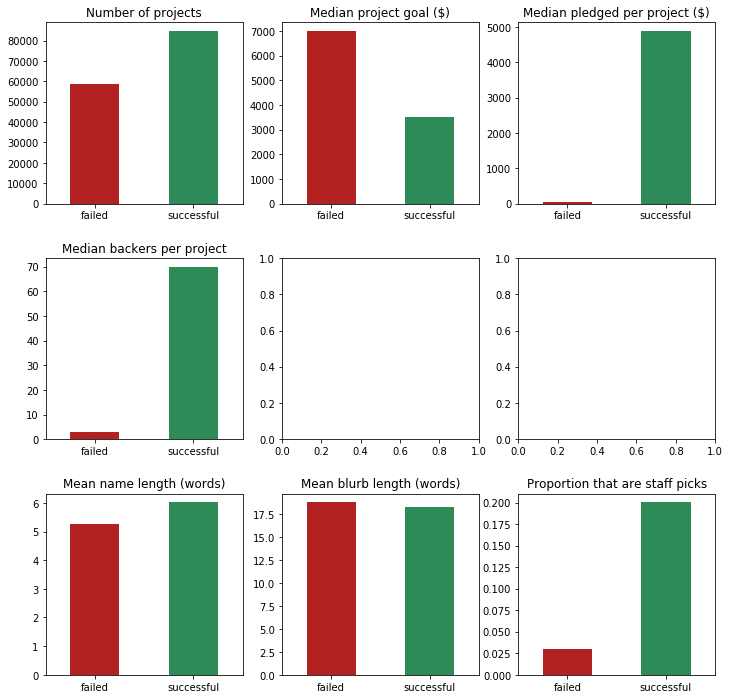

In [48]:
# Plotting the average amount pledged to successful and unsuccesful projects
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9)) = plt.subplots(3, 3, figsize=(12,12))

df['state'].value_counts(ascending=True).plot(kind='bar', ax=ax1, color=['firebrick', 'seagreen'], rot=0)
ax1.set_title('Number of projects')
ax1.set_xlabel('')

df.groupby('state').usd_goal.median().plot(kind='bar', ax=ax2, color=['firebrick', 'seagreen'], rot=0)
ax2.set_title('Median project goal ($)')
ax2.set_xlabel('')

df.groupby('state').usd_pledged.median().plot(kind='bar', ax=ax3, color=['firebrick', 'seagreen'], rot=0)
ax3.set_title('Median pledged per project ($)')
ax3.set_xlabel('')

df.groupby('state').backers_count.median().plot(kind='bar', ax=ax4, color=['firebrick', 'seagreen'], rot=0)
ax4.set_title('Median backers per project')
ax4.set_xlabel('')

df.groupby('state').name_length.mean().plot(kind='bar', ax=ax7, color=['firebrick', 'seagreen'], rot=0)
ax7.set_title('Mean name length (words)')
ax7.set_xlabel('')

df.groupby('state').blurb_length.mean().plot(kind='bar', ax=ax8, color=['firebrick', 'seagreen'], rot=0)
ax8.set_title('Mean blurb length (words)')
ax8.set_xlabel('')

# Creating a dataframe grouped by staff_pick with columns for failed and successful
pick_df = pd.get_dummies(df.set_index('staff_pick').state).groupby('staff_pick').sum()
# Normalizes counts by column, and selects the 'True' category (iloc[1])
(pick_df.div(pick_df.sum(axis=0), axis=1)).iloc[1].plot(kind='bar', ax=ax9, color=['firebrick', 'seagreen'], rot=0) 
ax9.set_title('Proportion that are staff picks')
ax9.set_xlabel('')

fig.subplots_adjust(hspace=0.3)
plt.show()

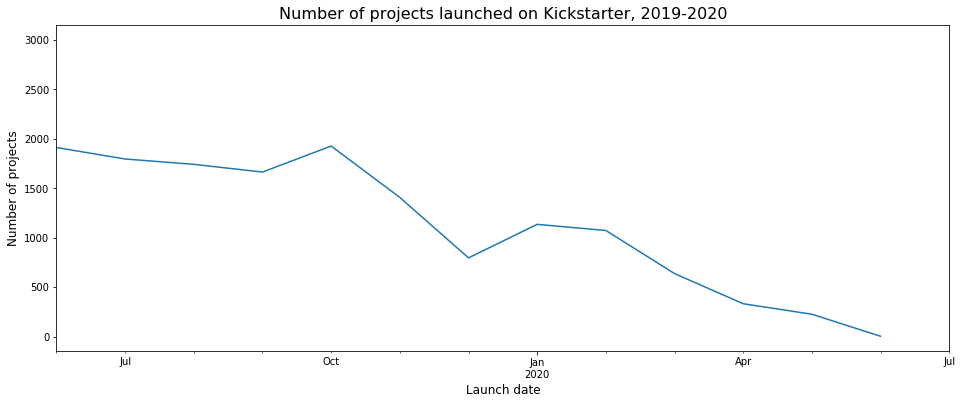

In [49]:
# Plotting the number of projects launched each month
plt.figure(figsize=(16,6))
df.set_index('launched_at').category.resample('MS').count().plot()
plt.xlim('2019-06-01', '2020-07-01') # Limiting to whole months
plt.xlabel('Launch date', fontsize=12)
plt.ylabel('Number of projects', fontsize=12)
plt.title('Number of projects launched on Kickstarter, 2019-2020', fontsize=16)
plt.show()

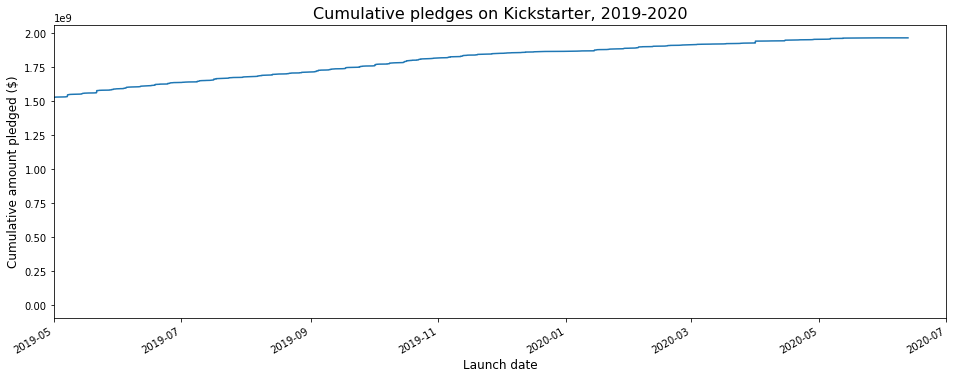

In [50]:
# Plotting the cumulative amount pledged on Kickstarter
plt.figure(figsize=(16,6))
df.set_index('launched_at').sort_index().usd_pledged.cumsum().plot()
plt.xlim('2019-05-01', '2020-07-01') # Limiting to whole months
plt.xlabel('Launch date', fontsize=12)
plt.ylabel('Cumulative amount pledged ($)', fontsize=12)
plt.title('Cumulative pledges on Kickstarter, 2019-2020', fontsize=16)
plt.show()

In [51]:
print("Average amount pledged per project in each month, in $:")
print(round(df.set_index('launched_at').usd_pledged.resample('YS').mean(),2))

Average amount pledged per project in each month, in $:
launched_at
2009-01-01     3481.27
2010-01-01     4895.87
2011-01-01     5850.82
2012-01-01     8461.49
2013-01-01    15874.37
2014-01-01    10233.65
2015-01-01    10283.96
2016-01-01    10865.90
2017-01-01    12162.34
2018-01-01    15144.50
2019-01-01    23604.28
2020-01-01    29057.48
Freq: AS-JAN, Name: usd_pledged, dtype: float64


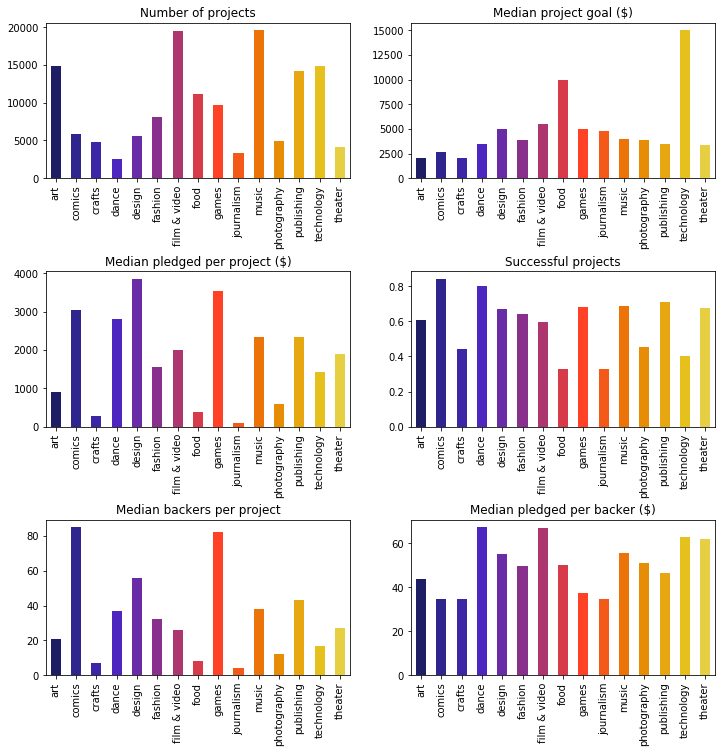

In [52]:
# Creating a dataframe grouped by category with columns for failed and successful
cat_df = pd.get_dummies(df.set_index('category').state).groupby('category').sum()

# Plotting
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2, figsize=(12,12))

color = cm.CMRmap(np.linspace(0.1,0.8,df.category.nunique())) # Setting a colormap

df.groupby('category').category.count().plot(kind='bar', ax=ax1, color=color)
ax1.set_title('Number of projects')
ax1.set_xlabel('')

df.groupby('category').usd_goal.median().plot(kind='bar', ax=ax2, color=color)
ax2.set_title('Median project goal ($)')
ax2.set_xlabel('')

df.groupby('category').usd_pledged.median().plot(kind='bar', ax=ax3, color=color)
ax3.set_title('Median pledged per project ($)')
ax3.set_xlabel('')

cat_df.div(cat_df.sum(axis=1), axis=0).successful.plot(kind='bar', ax=ax4, color=color) # Normalizes counts across rows
ax4.set_title('Successful projects')
ax4.set_xlabel('')

df.groupby('category').backers_count.median().plot(kind='bar', ax=ax5, color=color)
ax5.set_title('Median backers per project')
ax5.set_xlabel('')

df.groupby('category').pledge_per_backer.median().plot(kind='bar', ax=ax6, color=color)
ax6.set_title('Median pledged per backer ($)')
ax6.set_xlabel('')

fig.subplots_adjust(hspace=0.6)
plt.show()

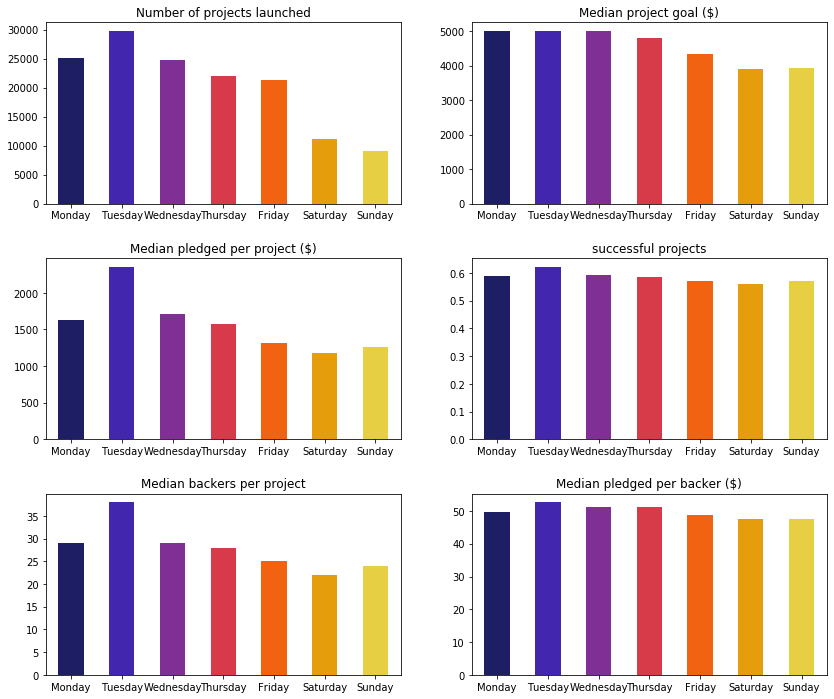

In [53]:
# Creating a dataframe grouped by the day on which they were launched, with columns for failed and successful
day_df = pd.get_dummies(df.set_index('launch_day').state).groupby('launch_day').sum()

# Plotting
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2, figsize=(14,12))

color = cm.CMRmap(np.linspace(0.1,0.8,df.launch_day.nunique()))

weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

df.groupby('launch_day').launch_day.count().reindex(weekdays).plot(kind='bar', ax=ax1, color=color, rot=0)
ax1.set_title('Number of projects launched')
ax1.set_xlabel('')

df.groupby('launch_day').usd_goal.median().reindex(weekdays).plot(kind='bar', ax=ax2, color=color, rot=0)
ax2.set_title('Median project goal ($)')
ax2.set_xlabel('')

df.groupby('launch_day').usd_pledged.median().reindex(weekdays).plot(kind='bar', ax=ax3, color=color, rot=0)
ax3.set_title('Median pledged per project ($)')
ax3.set_xlabel('')

day_df.div(day_df.sum(axis=1), axis=0).successful.reindex(weekdays).plot(kind='bar', ax=ax4, color=color, rot=0) # Normalizes counts across rows
ax4.set_title('successful projects')
ax4.set_xlabel('')

df.groupby('launch_day').backers_count.median().reindex(weekdays).plot(kind='bar', ax=ax5, color=color, rot=0)
ax5.set_title('Median backers per project')
ax5.set_xlabel('')

df.groupby('launch_day').pledge_per_backer.median().reindex(weekdays).plot(kind='bar', ax=ax6, color=color, rot=0)
ax6.set_title('Median pledged per backer ($)')
ax6.set_xlabel('')

fig.subplots_adjust(hspace=0.3)
plt.show()

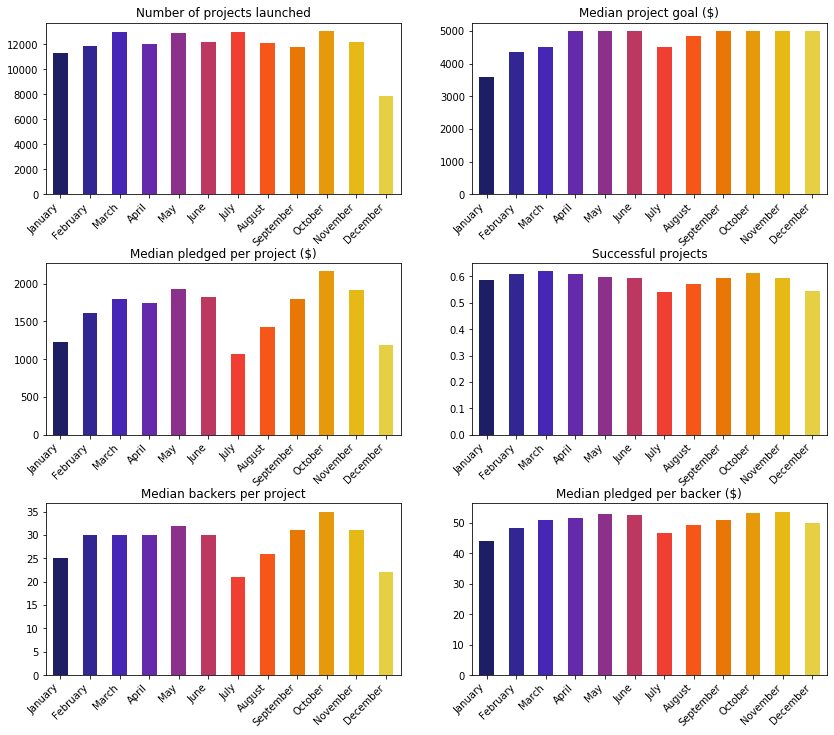

In [54]:
# Creating a dataframe grouped by the month in which they were launched, with columns for failed and successful
month_df = pd.get_dummies(df.set_index('launch_month').state).groupby('launch_month').sum()

# Plotting
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2, figsize=(14,12))

color = cm.CMRmap(np.linspace(0.1,0.8,df.launch_month.nunique()))

df.groupby('launch_month').launch_month.count().reindex(months).plot(kind='bar', ax=ax1, color=color, rot=45)
ax1.set_title('Number of projects launched')
ax1.set_xlabel('')
ax1.set_xticklabels(labels=ax1.get_xticklabels(), ha='right')

df.groupby('launch_month').usd_goal.median().reindex(months).plot(kind='bar', ax=ax2, color=color, rot=45)
ax2.set_title('Median project goal ($)')
ax2.set_xlabel('')
ax2.set_xticklabels(labels=ax2.get_xticklabels(), ha='right')

df.groupby('launch_month').usd_pledged.median().reindex(months).plot(kind='bar', ax=ax3, color=color, rot=45)
ax3.set_title('Median pledged per project ($)')
ax3.set_xlabel('')
ax3.set_xticklabels(labels=ax3.get_xticklabels(), ha='right')

month_df.div(month_df.sum(axis=1), axis=0).successful.reindex(months).plot(kind='bar', ax=ax4, color=color, rot=45) # Normalizes counts across rows
ax4.set_title('Successful projects')
ax4.set_xlabel('')
ax4.set_xticklabels(labels=ax4.get_xticklabels(), ha='right')

df.groupby('launch_month').backers_count.median().reindex(months).plot(kind='bar', ax=ax5, color=color, rot=45)
ax5.set_title('Median backers per project')
ax5.set_xlabel('')
ax5.set_xticklabels(labels=ax5.get_xticklabels(), ha='right')

df.groupby('launch_month').pledge_per_backer.median().reindex(months).plot(kind='bar', ax=ax6, color=color, rot=45)
ax6.set_title('Median pledged per backer ($)')
ax6.set_xlabel('')
ax6.set_xticklabels(labels=ax6.get_xticklabels(), ha='right')

fig.subplots_adjust(hspace=0.4)
plt.show()

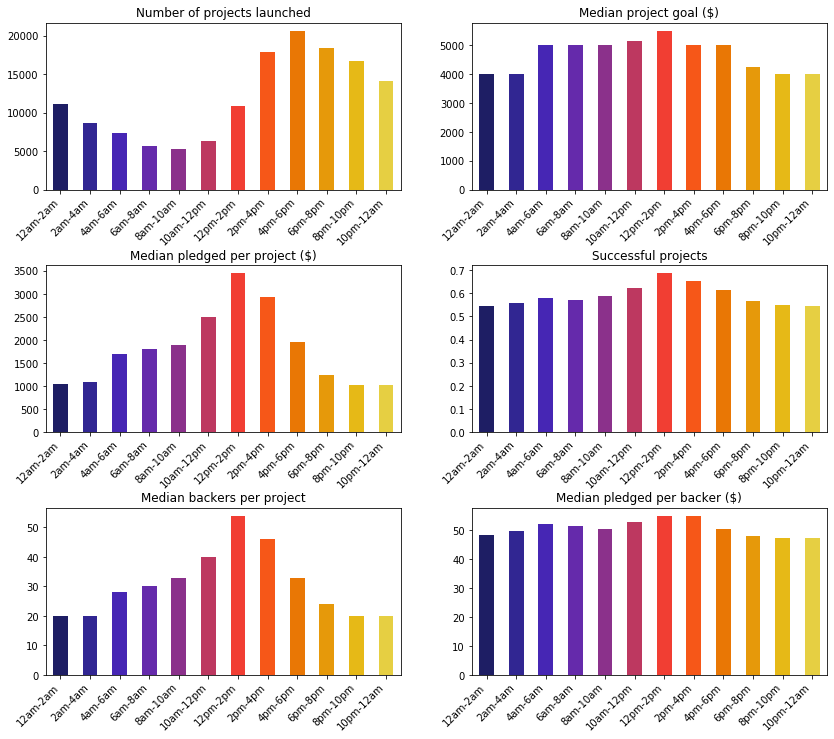

In [55]:
# Creating a dataframe grouped by the time at which they were launched, with columns for failed and successful
time_df = pd.get_dummies(df.set_index('launch_time').state).groupby('launch_time').sum()

fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2, figsize=(14,12))

color = cm.CMRmap(np.linspace(0.1,0.8,df.launch_time.nunique()))

times = ['12am-2am', '2am-4am', '4am-6am', '6am-8am', '8am-10am', '10am-12pm', '12pm-2pm', '2pm-4pm', '4pm-6pm', '6pm-8pm', '8pm-10pm', '10pm-12am']

df.groupby('launch_time').launch_time.count().reindex(times).plot(kind='bar', ax=ax1, color=color, rot=45)
ax1.set_title('Number of projects launched')
ax1.set_xlabel('')
ax1.set_xticklabels(labels=ax1.get_xticklabels(), ha='right')

df.groupby('launch_time').usd_goal.median().reindex(times).plot(kind='bar', ax=ax2, color=color, rot=45)
ax2.set_title('Median project goal ($)')
ax2.set_xlabel('')
ax2.set_xticklabels(labels=ax2.get_xticklabels(), ha='right')

df.groupby('launch_time').usd_pledged.median().reindex(times).plot(kind='bar', ax=ax3, color=color, rot=45)
ax3.set_title('Median pledged per project ($)')
ax3.set_xlabel('')
ax3.set_xticklabels(labels=ax3.get_xticklabels(), ha='right')

time_df.div(time_df.sum(axis=1), axis=0).successful.reindex(times).plot(kind='bar', ax=ax4, color=color, rot=45) # Normalizes counts across rows
ax4.set_title('Successful projects')
ax4.set_xlabel('')
ax4.set_xticklabels(labels=ax4.get_xticklabels(), ha='right')

df.groupby('launch_time').backers_count.median().reindex(times).plot(kind='bar', ax=ax5, color=color, rot=45)
ax5.set_title('Median backers per project')
ax5.set_xlabel('')
ax5.set_xticklabels(labels=ax5.get_xticklabels(), ha='right')

df.groupby('launch_time').pledge_per_backer.median().reindex(times).plot(kind='bar', ax=ax6, color=color, rot=45)
ax6.set_title('Median pledged per backer ($)')
ax6.set_xlabel('')
ax6.set_xticklabels(labels=ax6.get_xticklabels(), ha='right')

fig.subplots_adjust(hspace=0.45)
plt.show()

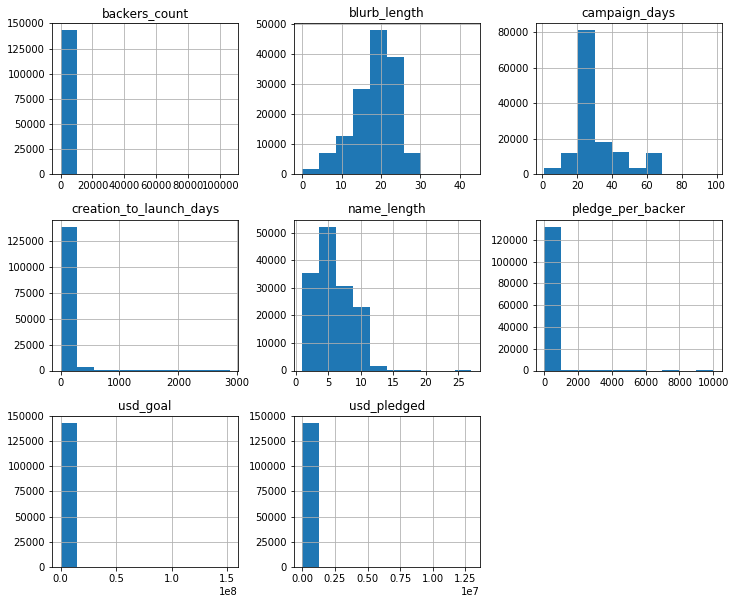

In [56]:
# Checking the distributions of continuous features
df[df.describe().columns].hist(figsize=(12,10));

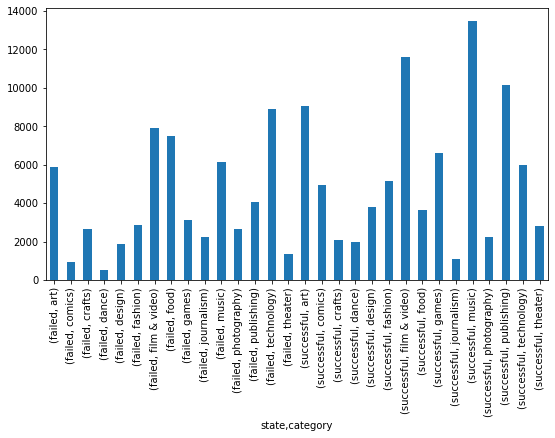

In [57]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(9,5))
df.groupby(['state', 'category']).blurb_length.count().plot.bar(ylim=0)
plt.show()

#### Preparing the data for machine learning

In [58]:
# Dropping columns and creating new dataframe
df_transformed = df.drop(['backers_count', 'created_at', 'deadline', 'is_starrable', 'launched_at', 'usd_pledged', 'sub_category', 'pledge_per_backer', 'usd_goal', 'name_length', 'creation_to_launch_days', 'campaign_days', 'launch_day', 'deadline_day', 'launch_month', 'deadline_month', 'launch_time', 'deadline_time', 'country', 'staff_pick'], axis=1)
df_transformed.head()

,category,state,blurb_length
id,,,
1655941487,games,successful,8.0
359915455,music,failed,22.0
1859434546,food,failed,21.0
1279967793,publishing,successful,18.0
1340461995,technology,failed,25.0


The dependent variable will now be converted into 1s (successful) and 0s (failure):

In [59]:
df_transformed['state'] = df_transformed['state'].replace({'failed': 0, 'successful': 1})

Categorical features will now be one-hot encoded:

In [60]:
# Creating dummy variables
df_transformed = pd.get_dummies(df_transformed)

The dependent (y) and independent (X) features will be separated into separate datasets. Because the features are on different scales, independent features will be transformed and normalised using StandardScaler.

In [61]:
X_unscaled = df_transformed.drop('state', axis=1)
y = df_transformed.state

In [62]:
# Transforming the data
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X_unscaled), columns=list(X_unscaled.columns))
X.head()

,blurb_length,category_art,category_comics,category_crafts,category_dance,category_design,category_fashion,category_film & video,category_food,category_games,category_journalism,category_music,category_photography,category_publishing,category_technology,category_theater
0,-1.966505,-0.341151,-0.206608,-0.184915,-0.132885,-0.202514,-0.244061,-0.397349,-0.290286,3.704885,-0.154694,-0.398479,-0.188797,-0.331816,-0.340360,-0.172772
1,0.666065,-0.341151,-0.206608,-0.184915,-0.132885,-0.202514,-0.244061,-0.397349,-0.290286,-0.269914,-0.154694,2.509542,-0.188797,-0.331816,-0.340360,-0.172772
2,0.478025,-0.341151,-0.206608,-0.184915,-0.132885,-0.202514,-0.244061,-0.397349,3.444881,-0.269914,-0.154694,-0.398479,-0.188797,-0.331816,-0.340360,-0.172772
3,-0.086098,-0.341151,-0.206608,-0.184915,-0.132885,-0.202514,-0.244061,-0.397349,-0.290286,-0.269914,-0.154694,-0.398479,-0.188797,3.013721,-0.340360,-0.172772
4,1.230188,-0.341151,-0.206608,-0.184915,-0.132885,-0.202514,-0.244061,-0.397349,-0.290286,-0.269914,-0.154694,-0.398479,-0.188797,-0.331816,2.938066,-0.172772


### Modeling

In this section, three different machine learning models for classification will be applied to the data, in order to create a model to classify projects into successes and failures.

The two categories are of a roughly equal size, so no measures need to be taken to adjust for inbalanced classes (e.g. SMOTE).

In [63]:
# Splitting and training/testing sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=123)

It is appropriate to select an evaluation method before running machine learning models - not after. The weighted average F1 score was selected. The F1 score calculates the harmonic mean between precision and recall, and is a suitable measure because there is no preference for false positives or false negatives in this case (both are equally bad). The weighted average will be used because the classes are of slightly different sizes, and we want to be able to predict both successes and failures.

### Model 1: vanilla logistic regression

Logistic regression can be used as a binary classifier in order to predict which of two categories a data point falls in to. To create a baseline model to improve upon, a logistic regression model will be fitted to the data, with default parameters.

In [64]:
# Fitting a logistic regression model with default parameters
logreg = LogisticRegression()
logreg.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [65]:
# Making predictions
y_hat_train = logreg.predict(X_train)
y_hat_test = logreg.predict(X_test)

In [66]:
# Logistic regression scores
print("Logistic regression score for training set:", round(logreg.score(X_train, y_train),5))
print("Logistic regression score for test set:", round(logreg.score(X_test, y_test),5))
print("\nClassification report:")
print(classification_report(y_test, y_hat_test))

Logistic regression score for training set: 0.65238
Logistic regression score for test set: 0.65336

Classification report:
              precision    recall  f1-score   support

           0       0.62      0.40      0.49     17559
           1       0.67      0.83      0.74     25405

    accuracy                           0.65     42964
   macro avg       0.64      0.61      0.61     42964
weighted avg       0.65      0.65      0.64     42964



In [67]:
def plot_cf(y_true, y_pred, class_names=None, model_name=None):
    """Plots a confusion matrix"""
    cf = confusion_matrix(y_true, y_pred)
    plt.imshow(cf, cmap=plt.cm.Blues)
    plt.grid(b=None)
    if model_name:
        plt.title("Confusion Matrix: {}".format(model_name))
    else:
        plt.title("Confusion Matrix")
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    
    class_names = set(y_true)
    tick_marks = np.arange(len(class_names))
    if class_names:
        plt.xticks(tick_marks, class_names)
        plt.yticks(tick_marks, class_names)
    
    thresh = cf.max() / 2.
    
    for i, j in itertools.product(range(cf.shape[0]), range(cf.shape[1])):
        plt.text(j, i, cf[i, j], horizontalalignment='center', color='white' if cf[i, j] > thresh else 'black')

    plt.colorbar()

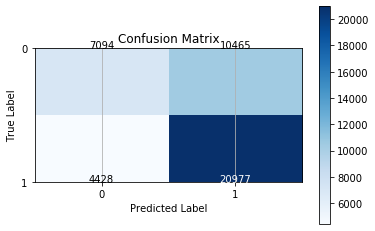

In [68]:
# Confusion matrix
plot_cf(y_test, y_hat_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


AUC: 0.66406


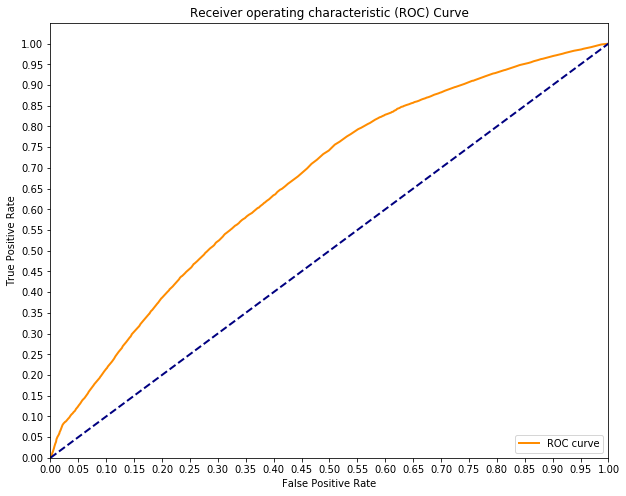

In [69]:

# Plotting the AUC-ROC
y_score = logreg.fit(X_train, y_train).decision_function(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_score)

print('AUC:', round(auc(fpr, tpr),5))

plt.figure(figsize=(10,8))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

The logistic regression model has a fairly good accuracy score of around 0.6 (weighted average F1 score), with similar results for the test and train set. However, it is worse at predicting failures compared to successes, and the recall rate (ability to correctly predict positives out of all of the actual positives in the data) is notably different between the failure and success categories. The AUC value is pretty high, and the curve is pulled towards the top left of the graph, which is a positive sign. However, this can probably be improved upon.

### Principal Component Analysis and feature weightings

There are a large number of features in the dataset (106). PCA (Principal Component Analysis) can be used to reduce this into a smaller number of components which still explain as much variation in the data as possible.

In [70]:
pca = PCA()
pca.fit_transform(X)
explained_var = np.cumsum(pca.explained_variance_ratio_)

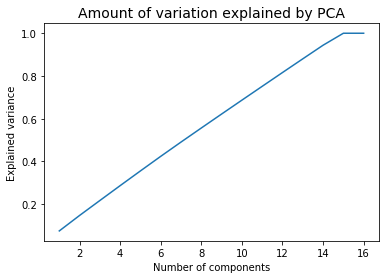

In [71]:
# Plotting the amount of variation explained by PCA with different numbers of components
plt.plot(list(range(1, len(explained_var)+1)), explained_var)
plt.title('Amount of variation explained by PCA', fontsize=14)
plt.xlabel('Number of components')
plt.ylabel('Explained variance');

There is no obvious elbow in this plot, so three different values for n_components will be tried below with logistic regression to see which produces the best score.

In [72]:
print("Number of components explaining 80% of variance:", np.where(explained_var > 0.8)[0][0])
print("Number of components explaining 90% of variance:", np.where(explained_var > 0.9)[0][0])
print("Number of components explaining 99% of variance:", np.where(explained_var > 0.99)[0][0])

Number of components explaining 80% of variance: 11
Number of components explaining 90% of variance: 13
Number of components explaining 99% of variance: 14


The number of components to be used will be assessed by running logistic regression models using each of the three numbers of components.

In [73]:
n_comps = [11,13,14]
for n in n_comps:
    pipe = Pipeline([('pca', PCA(n_components=n)), ('clf', LogisticRegression())])
    pipe.fit(X_train, y_train)
    print("\nNumber of components:", n)
    print("Score:", round(pipe.score(X_test, y_test),5))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)



Number of components: 11
Score: 0.64521


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)



Number of components: 13
Score: 0.65334


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)



Number of components: 14
Score: 0.65327


The above results show that the score is highest for 90 components, although the difference is small (c. 1% improvement from 11 components).

In [74]:
# Feature weightings on each component, in order of average weighting
pca = PCA(n_components=2)
pca.fit_transform(X)
pca_90_components = pd.DataFrame(pca.components_,columns=X.columns).T # Components as columns, features as rows
pca_90_components['mean_weight'] = pca_90_components.iloc[:].abs().mean(axis=1)
pca_90_components.sort_values('mean_weight', ascending=False)

,0,1,mean_weight
category_film & video,0.370896,-0.644322,0.507609
category_music,0.349656,0.664281,0.506968
blurb_length,0.595839,-0.018385,0.307112
category_art,-0.442256,-0.051428,0.246842
category_games,-0.202996,0.261784,0.232390
category_food,0.196882,0.123907,0.160395
category_technology,-0.135662,-0.127548,0.131605
category_fashion,-0.207338,-0.055328,0.131333
category_design,-0.173095,-0.028649,0.100872
category_theater,0.073639,-0.121082,0.097360


The graph below plots the average weight of each feature on each component. It shows that there is relatively little variation between the average weights of each feature, i.e. how much each feature is included in each component.

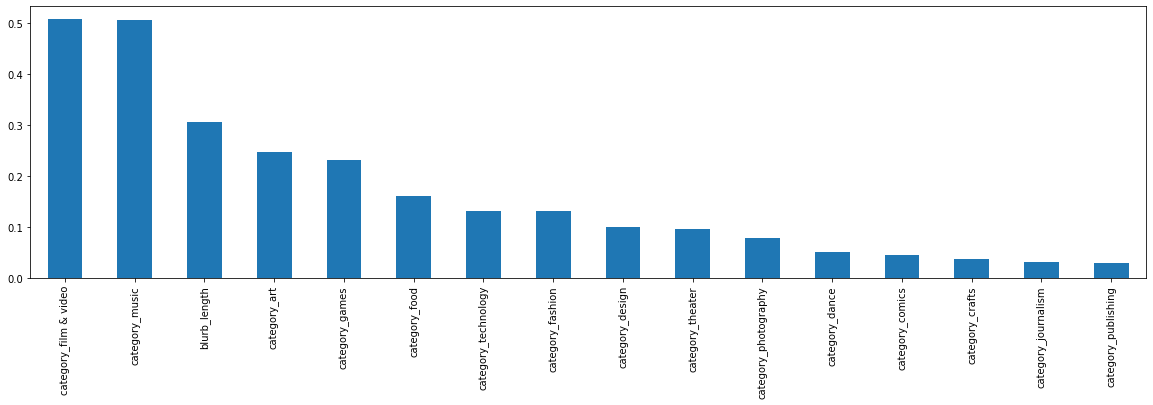

In [75]:
# Plotting feature importances
plt.figure(figsize=(20,5))
pca_90_components.mean_weight.sort_values(ascending=False).plot(kind='bar')
plt.show()

In [76]:
pca_90_components[0].map(lambda x : x).abs().sort_values(ascending = False)[:10]

blurb_length             0.595839
category_art             0.442256
category_film & video    0.370896
category_music           0.349656
category_fashion         0.207338
category_games           0.202996
category_food            0.196882
category_design          0.173095
category_technology      0.135662
category_theater         0.073639
Name: 0, dtype: float64

In [77]:
pca_90_components[1].map(lambda x : x).abs().sort_values(ascending = False)[:10]

category_music           0.664281
category_film & video    0.644322
category_games           0.261784
category_technology      0.127548
category_food            0.123907
category_theater         0.121082
category_photography     0.093963
category_comics          0.088237
category_crafts          0.058544
category_fashion         0.055328
Name: 1, dtype: float64

### Model 2: logistic regression with PCA and parameter optimisation

The logistic regression model can potentially be further improved by optimising its parameters. GridSearchCV can be used to test multiple different regularisation parameters (values of C), penalties (l1 or l2) and models with and without an intercept.

In [78]:
# Using GridSearchCV to test multiple different parameters
logreg_start = time.time()

pipe_logreg = Pipeline([('pca', PCA(n_components=14)),
                    ('clf', LogisticRegression())])

params_logreg = [
    {'clf__penalty': ['l1', 'l2'],
     'clf__fit_intercept': [True, False],
        'clf__C': [0.001, 0.01, 1, 10]
    }
]

grid_logreg = GridSearchCV(estimator=pipe_logreg,
                  param_grid=params_logreg,
                  cv=5)

grid_logreg.fit(X_train, y_train)

logreg_end = time.time()

logreg_best_score = grid_logreg.best_score_
logreg_best_params = grid_logreg.best_params_

print(f"Time taken to run: {round((logreg_end - logreg_start)/60,1)} minutes")
print("Best accuracy:", round(logreg_best_score,2))
print("Best parameters:", logreg_best_params)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Time taken to run: 0.4 minutes
Best accuracy: 0.65
Best parameters: {'clf__C': 0.001, 'clf__fit_intercept': True, 'clf__penalty': 'l2'}


### Best logistic regression model

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Logistic regression score for training set: 0.65302
Logistic regression score for test set: 0.65327

Classification report:
              precision    recall  f1-score   support

           0       0.61      0.41      0.49     17559
           1       0.67      0.82      0.74     25405

    accuracy                           0.65     42964
   macro avg       0.64      0.62      0.61     42964
weighted avg       0.65      0.65      0.64     42964



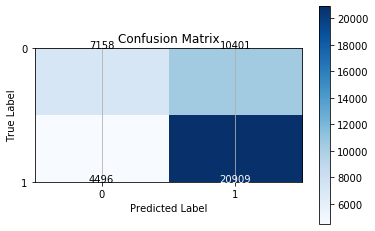

In [79]:
pipe_best_logreg = Pipeline([('pca', PCA(n_components=14)),
                    ('clf', LogisticRegression(C=10, fit_intercept=True, penalty='l2'))])

pipe_best_logreg.fit(X_train, y_train)

lr_y_hat_train = pipe_best_logreg.predict(X_train)
lr_y_hat_test = pipe_best_logreg.predict(X_test)

print("Logistic regression score for training set:", round(pipe_best_logreg.score(X_train, y_train),5))
print("Logistic regression score for test set:", round(pipe_best_logreg.score(X_test, y_test),5))
print("\nClassification report:")
print(classification_report(y_test, lr_y_hat_test))
plot_cf(y_test, lr_y_hat_test)

After hyperparameter tuning, the model's accuracy score is the same as the logistic regression model using default parameters (0.60 weighted average F1 score).

### Model 3: Random Forests

The Random Forest algorithm is a supervised learning algorithm that can be used for classification. It works by building multiple different decision trees to predict which category a data point belongs to.

In [80]:
# Random Forests with default settings
pipe_rf = Pipeline([('pca', PCA(n_components=14)),
                    ('clf', RandomForestClassifier())])
pipe_rf.fit(X_train, y_train)
print("Score:", round(pipe_rf.score(X_test, y_test),5))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Score: 0.65413


In [81]:
# Reporting the depths of each tree in the model created by the default Random Forest classifier, to get a sense of the
# maximum depth that a tree can be if depth is not limited, to help with choosing parameters to try with GridSearchCV
[estimator.tree_.max_depth for estimator in pipe_rf.named_steps['clf'].estimators_]

[20, 21, 20, 21, 22, 23, 24, 23, 21, 20]

In [82]:
# Using GridSearchCV to test multiple different parameters
rf_start = time.time()

pipe_rf = Pipeline([('pca', PCA(n_components=14)),
                    ('clf', RandomForestClassifier())])

params_rf = [ 
  {'clf__n_estimators': [100],
   'clf__max_depth': [20, 30, 40],    
   'clf__min_samples_split':[0.001, 0.01]
  }
]

grid_rf = GridSearchCV(estimator=pipe_rf,
                  param_grid=params_rf,
                  cv=5)

grid_rf.fit(X_train, y_train)

rf_end = time.time()

rf_best_score = grid_rf.best_score_
rf_best_params = grid_rf.best_params_

print(f"Time taken to run: {round((rf_end - rf_start)/60,1)} minutes")
print("Best accuracy:", round(rf_best_score,2))
print("Best parameters:", rf_best_params)

Time taken to run: 3.4 minutes
Best accuracy: 0.65
Best parameters: {'clf__max_depth': 30, 'clf__min_samples_split': 0.01, 'clf__n_estimators': 100}


#### Best Random Forest model

Random Forest score for training set: 0.65568
Random Forest score for test set: 0.65432

Classification report:
              precision    recall  f1-score   support

           0       0.61      0.42      0.50     17559
           1       0.67      0.82      0.74     25405

    accuracy                           0.65     42964
   macro avg       0.64      0.62      0.62     42964
weighted avg       0.65      0.65      0.64     42964



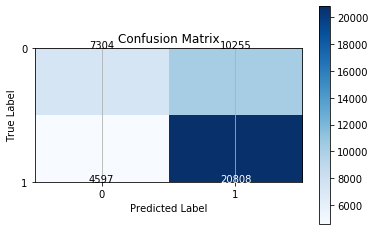

In [83]:
pipe_best_rf = Pipeline([('pca', PCA(n_components=14)),
                    ('clf', RandomForestClassifier(max_depth=30, min_samples_split=0.001, n_estimators=100))])

pipe_best_rf.fit(X_train, y_train)

rf_y_hat_train = pipe_best_rf.predict(X_train)
rf_y_hat_test = pipe_best_rf.predict(X_test)

print("Random Forest score for training set:", round(pipe_best_rf.score(X_train, y_train),5))
print("Random Forest score for test set:", round(pipe_best_rf.score(X_test, y_test),5))
print("\nClassification report:")
print(classification_report(y_test, rf_y_hat_test))
plot_cf(y_test, rf_y_hat_test)

After hyperparameter tuning, the model's accuracy score has remained the same at 0.65 (weighted average f1 score). No change from accuracy score for the training set and the test set suggests that there is no over-fitting.

## Model 4: vanilla logistic regression with log-transformed data

Previously, positively skewed data was not log-transformed. Now a log transformation will be applied to the skewed features, and a logistic regression model fitted again to see whether this improved accuracy.

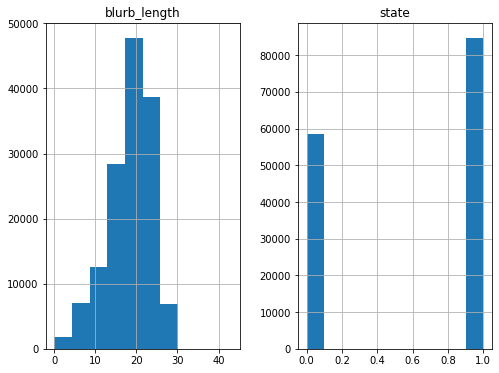

In [84]:
# Assessing skewed distributions
cols_to_log = ['blurb_length', 'state']
df_transformed[cols_to_log].hist(figsize=(8,6));

In [85]:
df_transformed.head()

,state,blurb_length,category_art,category_comics,category_crafts,category_dance,category_design,category_fashion,category_film & video,category_food,category_games,category_journalism,category_music,category_photography,category_publishing,category_technology,category_theater
id,,,,,,,,,,,,,,,,,
1655941487,1,8.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
359915455,0,22.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1859434546,0,21.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1279967793,1,18.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1340461995,0,25.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


Now the data can be prepared again for machine learning by separating X and y, and scaling:

In [86]:
X_unscaled_log = df_transformed.drop('state', axis=1)
y_log = df_transformed.state

In [87]:
# Transforming the data
scaler = StandardScaler()
X_log = pd.DataFrame(scaler.fit_transform(X_unscaled_log), columns=list(X_unscaled_log.columns))
X_log.head()

,blurb_length,category_art,category_comics,category_crafts,category_dance,category_design,category_fashion,category_film & video,category_food,category_games,category_journalism,category_music,category_photography,category_publishing,category_technology,category_theater
0,-1.966505,-0.341151,-0.206608,-0.184915,-0.132885,-0.202514,-0.244061,-0.397349,-0.290286,3.704885,-0.154694,-0.398479,-0.188797,-0.331816,-0.340360,-0.172772
1,0.666065,-0.341151,-0.206608,-0.184915,-0.132885,-0.202514,-0.244061,-0.397349,-0.290286,-0.269914,-0.154694,2.509542,-0.188797,-0.331816,-0.340360,-0.172772
2,0.478025,-0.341151,-0.206608,-0.184915,-0.132885,-0.202514,-0.244061,-0.397349,3.444881,-0.269914,-0.154694,-0.398479,-0.188797,-0.331816,-0.340360,-0.172772
3,-0.086098,-0.341151,-0.206608,-0.184915,-0.132885,-0.202514,-0.244061,-0.397349,-0.290286,-0.269914,-0.154694,-0.398479,-0.188797,3.013721,-0.340360,-0.172772
4,1.230188,-0.341151,-0.206608,-0.184915,-0.132885,-0.202514,-0.244061,-0.397349,-0.290286,-0.269914,-0.154694,-0.398479,-0.188797,-0.331816,2.938066,-0.172772


In [88]:
# Splitting into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_log, y_log, test_size=0.3, random_state=123)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Logistic regression score for training set: 0.65238
Logistic regression score for test set: 0.65336

Classification report:
              precision    recall  f1-score   support

           0       0.62      0.40      0.49     17559
           1       0.67      0.83      0.74     25405

    accuracy                           0.65     42964
   macro avg       0.64      0.61      0.61     42964
weighted avg       0.65      0.65      0.64     42964



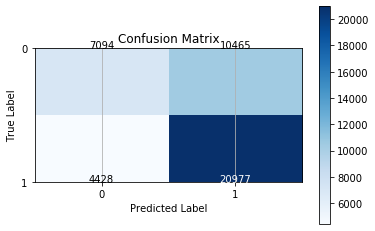

In [89]:
# Fitting a logistic regression model with default parameters
logreg = LogisticRegression()
logreg.fit(X_train,y_train)

# Making predictions
lr_y_hat_train2 = logreg.predict(X_train)
lr_y_hat_test2 = logreg.predict(X_test)

# Logistic regression scores
print("Logistic regression score for training set:", round(logreg.score(X_train, y_train),5))
print("Logistic regression score for test set:", round(logreg.score(X_test, y_test),5))
print("\nClassification report:")
print(classification_report(y_test, lr_y_hat_test2))
# Confusion matrix
plot_cf(y_test, lr_y_hat_test2)

## Model 5: Random Forests without PCA

A Random Forest model will now be fitted using the log-transformed data, but without using PCA. This is to allow for the construction of a list of feature importances.

In [90]:
# Using GridSearchCV to test multiple different parameters
rf_start2 = time.time()

rf2 = RandomForestClassifier(min_samples_split=0.001, verbose=2)

params_rf2 = [ 
  {'n_estimators': [200, 400],
   'max_depth': [20, 35]
  }
]

grid_rf2 = GridSearchCV(estimator=rf2, param_grid=params_rf2, cv=5)

grid_rf2.fit(X_train, y_train)

rf_end2 = time.time()

rf_best_score2 = grid_rf2.best_score_
rf_best_params2 = grid_rf2.best_params_

print(f"Time taken to run: {round((rf_end2 - rf_start2)/60,1)} minutes")
print("Best accuracy:", round(rf_best_score2,2))
print("Best parameters:", rf_best_params2)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 200
building tree 2 of 200
building tree 3 of 200
building tree 4 of 200
building tree 5 of 200
building tree 6 of 200
building tree 7 of 200
building tree 8 of 200
building tree 9 of 200
building tree 10 of 200
building tree 11 of 200
building tree 12 of 200
building tree 13 of 200
building tree 14 of 200
building tree 15 of 200
building tree 16 of 200
building tree 17 of 200
building tree 18 of 200
building tree 19 of 200
building tree 20 of 200
building tree 21 of 200
building tree 22 of 200
building tree 23 of 200
building tree 24 of 200
building tree 25 of 200
building tree 26 of 200
building tree 27 of 200
building tree 28 of 200
building tree 29 of 200
building tree 30 of 200
building tree 31 of 200
building tree 32 of 200
building tree 33 of 200
building tree 34 of 200
building tree 35 of 200
building tree 36 of 200
building tree 37 of 200
building tree 38 of 200
building tree 39 of 200
building tree 40 of 200
building tree 41 of 200
building tree 42 of 200
b

[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    9.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 200
building tree 2 of 200
building tree 3 of 200
building tree 4 of 200
building tree 5 of 200
building tree 6 of 200
building tree 7 of 200
building tree 8 of 200
building tree 9 of 200
building tree 10 of 200
building tree 11 of 200
building tree 12 of 200
building tree 13 of 200
building tree 14 of 200
building tree 15 of 200
building tree 16 of 200
building tree 17 of 200
building tree 18 of 200
building tree 19 of 200
building tree 20 of 200
building tree 21 of 200
building tree 22 of 200
building tree 23 of 200
building tree 24 of 200
building tree 25 of 200
building tree 26 of 200
building tree 27 of 200
building tree 28 of 200
building tree 29 of 200
building tree 30 of 200
building tree 31 of 200
building tree 32 of 200
building tree 33 of 200
building tree 34 of 200
building tree 35 of 200
building tree 36 of 200
building tree 37 of 200
building tree 38 of 200
building tree 39 of 200
building tree 40 of 200
building tree 41 of 200
building tree 42 of 200
b

[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    9.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 200
building tree 2 of 200
building tree 3 of 200
building tree 4 of 200
building tree 5 of 200
building tree 6 of 200
building tree 7 of 200
building tree 8 of 200
building tree 9 of 200
building tree 10 of 200
building tree 11 of 200
building tree 12 of 200
building tree 13 of 200
building tree 14 of 200
building tree 15 of 200
building tree 16 of 200
building tree 17 of 200
building tree 18 of 200
building tree 19 of 200
building tree 20 of 200
building tree 21 of 200
building tree 22 of 200
building tree 23 of 200
building tree 24 of 200
building tree 25 of 200
building tree 26 of 200
building tree 27 of 200
building tree 28 of 200
building tree 29 of 200
building tree 30 of 200
building tree 31 of 200
building tree 32 of 200
building tree 33 of 200
building tree 34 of 200
building tree 35 of 200
building tree 36 of 200
building tree 37 of 200
building tree 38 of 200
building tree 39 of 200
building tree 40 of 200
building tree 41 of 200
building tree 42 of 200
b

[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    8.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 200
building tree 2 of 200
building tree 3 of 200
building tree 4 of 200
building tree 5 of 200
building tree 6 of 200
building tree 7 of 200
building tree 8 of 200
building tree 9 of 200
building tree 10 of 200
building tree 11 of 200
building tree 12 of 200
building tree 13 of 200
building tree 14 of 200
building tree 15 of 200
building tree 16 of 200
building tree 17 of 200
building tree 18 of 200
building tree 19 of 200
building tree 20 of 200
building tree 21 of 200
building tree 22 of 200
building tree 23 of 200
building tree 24 of 200
building tree 25 of 200
building tree 26 of 200
building tree 27 of 200
building tree 28 of 200
building tree 29 of 200
building tree 30 of 200
building tree 31 of 200
building tree 32 of 200
building tree 33 of 200
building tree 34 of 200
building tree 35 of 200
building tree 36 of 200
building tree 37 of 200
building tree 38 of 200
building tree 39 of 200
building tree 40 of 200
building tree 41 of 200
building tree 42 of 200
b

[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    9.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 200
building tree 2 of 200
building tree 3 of 200
building tree 4 of 200
building tree 5 of 200
building tree 6 of 200
building tree 7 of 200
building tree 8 of 200
building tree 9 of 200
building tree 10 of 200
building tree 11 of 200
building tree 12 of 200
building tree 13 of 200
building tree 14 of 200
building tree 15 of 200
building tree 16 of 200
building tree 17 of 200
building tree 18 of 200
building tree 19 of 200
building tree 20 of 200
building tree 21 of 200
building tree 22 of 200
building tree 23 of 200
building tree 24 of 200
building tree 25 of 200
building tree 26 of 200
building tree 27 of 200
building tree 28 of 200
building tree 29 of 200
building tree 30 of 200
building tree 31 of 200
building tree 32 of 200
building tree 33 of 200
building tree 34 of 200
building tree 35 of 200
building tree 36 of 200
building tree 37 of 200
building tree 38 of 200
building tree 39 of 200
building tree 40 of 200
building tree 41 of 200
building tree 42 of 200
b

[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    9.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 400
building tree 2 of 400
building tree 3 of 400
building tree 4 of 400
building tree 5 of 400


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 6 of 400
building tree 7 of 400
building tree 8 of 400
building tree 9 of 400
building tree 10 of 400
building tree 11 of 400
building tree 12 of 400
building tree 13 of 400
building tree 14 of 400
building tree 15 of 400
building tree 16 of 400
building tree 17 of 400
building tree 18 of 400
building tree 19 of 400
building tree 20 of 400
building tree 21 of 400
building tree 22 of 400
building tree 23 of 400
building tree 24 of 400
building tree 25 of 400
building tree 26 of 400
building tree 27 of 400
building tree 28 of 400
building tree 29 of 400
building tree 30 of 400
building tree 31 of 400
building tree 32 of 400
building tree 33 of 400
building tree 34 of 400
building tree 35 of 400
building tree 36 of 400
building tree 37 of 400
building tree 38 of 400
building tree 39 of 400
building tree 40 of 400
building tree 41 of 400
building tree 42 of 400
building tree 43 of 400
building tree 44 of 400
building tree 45 of 400
building tree 46 of 400
building tree 47 of 

building tree 341 of 400
building tree 342 of 400
building tree 343 of 400
building tree 344 of 400
building tree 345 of 400
building tree 346 of 400
building tree 347 of 400
building tree 348 of 400
building tree 349 of 400
building tree 350 of 400
building tree 351 of 400
building tree 352 of 400
building tree 353 of 400
building tree 354 of 400
building tree 355 of 400
building tree 356 of 400
building tree 357 of 400
building tree 358 of 400
building tree 359 of 400
building tree 360 of 400
building tree 361 of 400
building tree 362 of 400
building tree 363 of 400
building tree 364 of 400
building tree 365 of 400
building tree 366 of 400
building tree 367 of 400
building tree 368 of 400
building tree 369 of 400
building tree 370 of 400
building tree 371 of 400
building tree 372 of 400
building tree 373 of 400
building tree 374 of 400
building tree 375 of 400
building tree 376 of 400
building tree 377 of 400
building tree 378 of 400
building tree 379 of 400
building tree 380 of 400


[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:   19.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:    1.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 400
building tree 2 of 400
building tree 3 of 400
building tree 4 of 400


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 5 of 400
building tree 6 of 400
building tree 7 of 400
building tree 8 of 400
building tree 9 of 400
building tree 10 of 400
building tree 11 of 400
building tree 12 of 400
building tree 13 of 400
building tree 14 of 400
building tree 15 of 400
building tree 16 of 400
building tree 17 of 400
building tree 18 of 400
building tree 19 of 400
building tree 20 of 400
building tree 21 of 400
building tree 22 of 400
building tree 23 of 400
building tree 24 of 400
building tree 25 of 400
building tree 26 of 400
building tree 27 of 400
building tree 28 of 400
building tree 29 of 400
building tree 30 of 400
building tree 31 of 400
building tree 32 of 400
building tree 33 of 400
building tree 34 of 400
building tree 35 of 400
building tree 36 of 400
building tree 37 of 400
building tree 38 of 400
building tree 39 of 400
building tree 40 of 400
building tree 41 of 400
building tree 42 of 400
building tree 43 of 400
building tree 44 of 400
building tree 45 of 400
building tree 46 of 4

building tree 341 of 400
building tree 342 of 400
building tree 343 of 400
building tree 344 of 400
building tree 345 of 400
building tree 346 of 400
building tree 347 of 400
building tree 348 of 400
building tree 349 of 400
building tree 350 of 400
building tree 351 of 400
building tree 352 of 400
building tree 353 of 400
building tree 354 of 400
building tree 355 of 400
building tree 356 of 400
building tree 357 of 400
building tree 358 of 400
building tree 359 of 400
building tree 360 of 400
building tree 361 of 400
building tree 362 of 400
building tree 363 of 400
building tree 364 of 400
building tree 365 of 400
building tree 366 of 400
building tree 367 of 400
building tree 368 of 400
building tree 369 of 400
building tree 370 of 400
building tree 371 of 400
building tree 372 of 400
building tree 373 of 400
building tree 374 of 400
building tree 375 of 400
building tree 376 of 400
building tree 377 of 400
building tree 378 of 400
building tree 379 of 400
building tree 380 of 400


[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:   18.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:    1.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 400
building tree 2 of 400
building tree 3 of 400
building tree 4 of 400
building tree 5 of 400


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 6 of 400
building tree 7 of 400
building tree 8 of 400
building tree 9 of 400
building tree 10 of 400
building tree 11 of 400
building tree 12 of 400
building tree 13 of 400
building tree 14 of 400
building tree 15 of 400
building tree 16 of 400
building tree 17 of 400
building tree 18 of 400
building tree 19 of 400
building tree 20 of 400
building tree 21 of 400
building tree 22 of 400
building tree 23 of 400
building tree 24 of 400
building tree 25 of 400
building tree 26 of 400
building tree 27 of 400
building tree 28 of 400
building tree 29 of 400
building tree 30 of 400
building tree 31 of 400
building tree 32 of 400
building tree 33 of 400
building tree 34 of 400
building tree 35 of 400
building tree 36 of 400
building tree 37 of 400
building tree 38 of 400
building tree 39 of 400
building tree 40 of 400
building tree 41 of 400
building tree 42 of 400
building tree 43 of 400
building tree 44 of 400
building tree 45 of 400
building tree 46 of 400
building tree 47 of 

building tree 340 of 400
building tree 341 of 400
building tree 342 of 400
building tree 343 of 400
building tree 344 of 400
building tree 345 of 400
building tree 346 of 400
building tree 347 of 400
building tree 348 of 400
building tree 349 of 400
building tree 350 of 400
building tree 351 of 400
building tree 352 of 400
building tree 353 of 400
building tree 354 of 400
building tree 355 of 400
building tree 356 of 400
building tree 357 of 400
building tree 358 of 400
building tree 359 of 400
building tree 360 of 400
building tree 361 of 400
building tree 362 of 400
building tree 363 of 400
building tree 364 of 400
building tree 365 of 400
building tree 366 of 400
building tree 367 of 400
building tree 368 of 400
building tree 369 of 400
building tree 370 of 400
building tree 371 of 400
building tree 372 of 400
building tree 373 of 400
building tree 374 of 400
building tree 375 of 400
building tree 376 of 400
building tree 377 of 400
building tree 378 of 400
building tree 379 of 400


[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:   19.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:    1.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 400
building tree 2 of 400
building tree 3 of 400
building tree 4 of 400


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 5 of 400
building tree 6 of 400
building tree 7 of 400
building tree 8 of 400
building tree 9 of 400
building tree 10 of 400
building tree 11 of 400
building tree 12 of 400
building tree 13 of 400
building tree 14 of 400
building tree 15 of 400
building tree 16 of 400
building tree 17 of 400
building tree 18 of 400
building tree 19 of 400
building tree 20 of 400
building tree 21 of 400
building tree 22 of 400
building tree 23 of 400
building tree 24 of 400
building tree 25 of 400
building tree 26 of 400
building tree 27 of 400
building tree 28 of 400
building tree 29 of 400
building tree 30 of 400
building tree 31 of 400
building tree 32 of 400
building tree 33 of 400
building tree 34 of 400
building tree 35 of 400
building tree 36 of 400
building tree 37 of 400
building tree 38 of 400
building tree 39 of 400
building tree 40 of 400
building tree 41 of 400
building tree 42 of 400
building tree 43 of 400
building tree 44 of 400
building tree 45 of 400
building tree 46 of 4

building tree 341 of 400
building tree 342 of 400
building tree 343 of 400
building tree 344 of 400
building tree 345 of 400
building tree 346 of 400
building tree 347 of 400
building tree 348 of 400
building tree 349 of 400
building tree 350 of 400
building tree 351 of 400
building tree 352 of 400
building tree 353 of 400
building tree 354 of 400
building tree 355 of 400
building tree 356 of 400
building tree 357 of 400
building tree 358 of 400
building tree 359 of 400
building tree 360 of 400
building tree 361 of 400
building tree 362 of 400
building tree 363 of 400
building tree 364 of 400
building tree 365 of 400
building tree 366 of 400
building tree 367 of 400
building tree 368 of 400
building tree 369 of 400
building tree 370 of 400
building tree 371 of 400
building tree 372 of 400
building tree 373 of 400
building tree 374 of 400
building tree 375 of 400
building tree 376 of 400
building tree 377 of 400
building tree 378 of 400
building tree 379 of 400
building tree 380 of 400


[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:   18.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:    1.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 400
building tree 2 of 400
building tree 3 of 400
building tree 4 of 400
building tree 5 of 400

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s



building tree 6 of 400
building tree 7 of 400
building tree 8 of 400
building tree 9 of 400
building tree 10 of 400
building tree 11 of 400
building tree 12 of 400
building tree 13 of 400
building tree 14 of 400
building tree 15 of 400
building tree 16 of 400
building tree 17 of 400
building tree 18 of 400
building tree 19 of 400
building tree 20 of 400
building tree 21 of 400
building tree 22 of 400
building tree 23 of 400
building tree 24 of 400
building tree 25 of 400
building tree 26 of 400
building tree 27 of 400
building tree 28 of 400
building tree 29 of 400
building tree 30 of 400
building tree 31 of 400
building tree 32 of 400
building tree 33 of 400
building tree 34 of 400
building tree 35 of 400
building tree 36 of 400
building tree 37 of 400
building tree 38 of 400
building tree 39 of 400
building tree 40 of 400
building tree 41 of 400
building tree 42 of 400
building tree 43 of 400
building tree 44 of 400
building tree 45 of 400
building tree 46 of 400
building tree 47 of

building tree 341 of 400
building tree 342 of 400
building tree 343 of 400
building tree 344 of 400
building tree 345 of 400
building tree 346 of 400
building tree 347 of 400
building tree 348 of 400
building tree 349 of 400
building tree 350 of 400
building tree 351 of 400
building tree 352 of 400
building tree 353 of 400
building tree 354 of 400
building tree 355 of 400
building tree 356 of 400
building tree 357 of 400
building tree 358 of 400
building tree 359 of 400
building tree 360 of 400
building tree 361 of 400
building tree 362 of 400
building tree 363 of 400
building tree 364 of 400
building tree 365 of 400
building tree 366 of 400
building tree 367 of 400
building tree 368 of 400
building tree 369 of 400
building tree 370 of 400
building tree 371 of 400
building tree 372 of 400
building tree 373 of 400
building tree 374 of 400
building tree 375 of 400
building tree 376 of 400
building tree 377 of 400
building tree 378 of 400
building tree 379 of 400
building tree 380 of 400


[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:   19.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:    1.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 200
building tree 2 of 200
building tree 3 of 200
building tree 4 of 200
building tree 5 of 200
building tree 6 of 200
building tree 7 of 200
building tree 8 of 200
building tree 9 of 200
building tree 10 of 200
building tree 11 of 200
building tree 12 of 200
building tree 13 of 200
building tree 14 of 200
building tree 15 of 200
building tree 16 of 200
building tree 17 of 200
building tree 18 of 200
building tree 19 of 200
building tree 20 of 200
building tree 21 of 200
building tree 22 of 200
building tree 23 of 200
building tree 24 of 200
building tree 25 of 200
building tree 26 of 200
building tree 27 of 200
building tree 28 of 200
building tree 29 of 200
building tree 30 of 200
building tree 31 of 200
building tree 32 of 200
building tree 33 of 200
building tree 34 of 200
building tree 35 of 200
building tree 36 of 200
building tree 37 of 200
building tree 38 of 200
building tree 39 of 200
building tree 40 of 200
building tree 41 of 200
building tree 42 of 200
b

[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:   10.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 200
building tree 2 of 200
building tree 3 of 200
building tree 4 of 200
building tree 5 of 200
building tree 6 of 200
building tree 7 of 200
building tree 8 of 200
building tree 9 of 200
building tree 10 of 200
building tree 11 of 200
building tree 12 of 200
building tree 13 of 200
building tree 14 of 200
building tree 15 of 200
building tree 16 of 200
building tree 17 of 200
building tree 18 of 200
building tree 19 of 200
building tree 20 of 200
building tree 21 of 200
building tree 22 of 200
building tree 23 of 200
building tree 24 of 200
building tree 25 of 200
building tree 26 of 200
building tree 27 of 200
building tree 28 of 200
building tree 29 of 200
building tree 30 of 200
building tree 31 of 200
building tree 32 of 200
building tree 33 of 200
building tree 34 of 200
building tree 35 of 200
building tree 36 of 200
building tree 37 of 200
building tree 38 of 200
building tree 39 of 200
building tree 40 of 200
building tree 41 of 200
building tree 42 of 200
b

[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    8.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 200
building tree 2 of 200
building tree 3 of 200
building tree 4 of 200
building tree 5 of 200
building tree 6 of 200
building tree 7 of 200
building tree 8 of 200
building tree 9 of 200
building tree 10 of 200
building tree 11 of 200
building tree 12 of 200
building tree 13 of 200
building tree 14 of 200
building tree 15 of 200
building tree 16 of 200
building tree 17 of 200
building tree 18 of 200
building tree 19 of 200
building tree 20 of 200
building tree 21 of 200
building tree 22 of 200
building tree 23 of 200
building tree 24 of 200
building tree 25 of 200
building tree 26 of 200
building tree 27 of 200
building tree 28 of 200
building tree 29 of 200
building tree 30 of 200
building tree 31 of 200
building tree 32 of 200
building tree 33 of 200
building tree 34 of 200
building tree 35 of 200
building tree 36 of 200
building tree 37 of 200
building tree 38 of 200
building tree 39 of 200
building tree 40 of 200
building tree 41 of 200
building tree 42 of 200
b

[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    8.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 200
building tree 2 of 200
building tree 3 of 200
building tree 4 of 200
building tree 5 of 200
building tree 6 of 200
building tree 7 of 200
building tree 8 of 200
building tree 9 of 200
building tree 10 of 200
building tree 11 of 200
building tree 12 of 200
building tree 13 of 200
building tree 14 of 200
building tree 15 of 200
building tree 16 of 200
building tree 17 of 200
building tree 18 of 200
building tree 19 of 200
building tree 20 of 200
building tree 21 of 200
building tree 22 of 200
building tree 23 of 200
building tree 24 of 200
building tree 25 of 200
building tree 26 of 200
building tree 27 of 200
building tree 28 of 200
building tree 29 of 200
building tree 30 of 200
building tree 31 of 200
building tree 32 of 200
building tree 33 of 200
building tree 34 of 200
building tree 35 of 200
building tree 36 of 200
building tree 37 of 200
building tree 38 of 200
building tree 39 of 200
building tree 40 of 200
building tree 41 of 200
building tree 42 of 200
b

[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    8.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 200
building tree 2 of 200
building tree 3 of 200
building tree 4 of 200
building tree 5 of 200
building tree 6 of 200
building tree 7 of 200
building tree 8 of 200
building tree 9 of 200
building tree 10 of 200
building tree 11 of 200
building tree 12 of 200
building tree 13 of 200
building tree 14 of 200
building tree 15 of 200
building tree 16 of 200
building tree 17 of 200
building tree 18 of 200
building tree 19 of 200
building tree 20 of 200
building tree 21 of 200
building tree 22 of 200
building tree 23 of 200
building tree 24 of 200
building tree 25 of 200
building tree 26 of 200
building tree 27 of 200
building tree 28 of 200
building tree 29 of 200
building tree 30 of 200
building tree 31 of 200
building tree 32 of 200
building tree 33 of 200
building tree 34 of 200
building tree 35 of 200
building tree 36 of 200
building tree 37 of 200
building tree 38 of 200
building tree 39 of 200
building tree 40 of 200
building tree 41 of 200
building tree 42 of 200
b

[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    8.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 400
building tree 2 of 400
building tree 3 of 400
building tree 4 of 400
building tree 5 of 400


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 6 of 400
building tree 7 of 400
building tree 8 of 400
building tree 9 of 400
building tree 10 of 400
building tree 11 of 400
building tree 12 of 400
building tree 13 of 400
building tree 14 of 400
building tree 15 of 400
building tree 16 of 400
building tree 17 of 400
building tree 18 of 400
building tree 19 of 400
building tree 20 of 400
building tree 21 of 400
building tree 22 of 400
building tree 23 of 400
building tree 24 of 400
building tree 25 of 400
building tree 26 of 400
building tree 27 of 400
building tree 28 of 400
building tree 29 of 400
building tree 30 of 400
building tree 31 of 400
building tree 32 of 400
building tree 33 of 400
building tree 34 of 400
building tree 35 of 400
building tree 36 of 400
building tree 37 of 400
building tree 38 of 400
building tree 39 of 400
building tree 40 of 400
building tree 41 of 400
building tree 42 of 400
building tree 43 of 400
building tree 44 of 400
building tree 45 of 400
building tree 46 of 400
building tree 47 of 

building tree 342 of 400
building tree 343 of 400
building tree 344 of 400
building tree 345 of 400
building tree 346 of 400
building tree 347 of 400
building tree 348 of 400
building tree 349 of 400
building tree 350 of 400
building tree 351 of 400
building tree 352 of 400
building tree 353 of 400
building tree 354 of 400
building tree 355 of 400
building tree 356 of 400
building tree 357 of 400
building tree 358 of 400
building tree 359 of 400
building tree 360 of 400
building tree 361 of 400
building tree 362 of 400
building tree 363 of 400
building tree 364 of 400
building tree 365 of 400
building tree 366 of 400
building tree 367 of 400
building tree 368 of 400
building tree 369 of 400
building tree 370 of 400
building tree 371 of 400
building tree 372 of 400
building tree 373 of 400
building tree 374 of 400
building tree 375 of 400
building tree 376 of 400
building tree 377 of 400
building tree 378 of 400
building tree 379 of 400
building tree 380 of 400
building tree 381 of 400


[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:   17.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:    1.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 400
building tree 2 of 400
building tree 3 of 400
building tree 4 of 400
building tree 5 of 400


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 6 of 400
building tree 7 of 400
building tree 8 of 400
building tree 9 of 400
building tree 10 of 400
building tree 11 of 400
building tree 12 of 400
building tree 13 of 400
building tree 14 of 400
building tree 15 of 400
building tree 16 of 400
building tree 17 of 400
building tree 18 of 400
building tree 19 of 400
building tree 20 of 400
building tree 21 of 400
building tree 22 of 400
building tree 23 of 400
building tree 24 of 400
building tree 25 of 400
building tree 26 of 400
building tree 27 of 400
building tree 28 of 400
building tree 29 of 400
building tree 30 of 400
building tree 31 of 400
building tree 32 of 400
building tree 33 of 400
building tree 34 of 400
building tree 35 of 400
building tree 36 of 400
building tree 37 of 400
building tree 38 of 400
building tree 39 of 400
building tree 40 of 400
building tree 41 of 400
building tree 42 of 400
building tree 43 of 400
building tree 44 of 400
building tree 45 of 400
building tree 46 of 400
building tree 47 of 

building tree 342 of 400
building tree 343 of 400
building tree 344 of 400
building tree 345 of 400
building tree 346 of 400
building tree 347 of 400
building tree 348 of 400
building tree 349 of 400
building tree 350 of 400
building tree 351 of 400
building tree 352 of 400
building tree 353 of 400
building tree 354 of 400
building tree 355 of 400
building tree 356 of 400
building tree 357 of 400
building tree 358 of 400
building tree 359 of 400
building tree 360 of 400
building tree 361 of 400
building tree 362 of 400
building tree 363 of 400
building tree 364 of 400
building tree 365 of 400
building tree 366 of 400
building tree 367 of 400
building tree 368 of 400
building tree 369 of 400
building tree 370 of 400
building tree 371 of 400
building tree 372 of 400
building tree 373 of 400
building tree 374 of 400
building tree 375 of 400
building tree 376 of 400
building tree 377 of 400
building tree 378 of 400
building tree 379 of 400
building tree 380 of 400
building tree 381 of 400


[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:   17.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:    1.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 400
building tree 2 of 400
building tree 3 of 400
building tree 4 of 400
building tree 5 of 400


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 6 of 400
building tree 7 of 400
building tree 8 of 400
building tree 9 of 400
building tree 10 of 400
building tree 11 of 400
building tree 12 of 400
building tree 13 of 400
building tree 14 of 400
building tree 15 of 400
building tree 16 of 400
building tree 17 of 400
building tree 18 of 400
building tree 19 of 400
building tree 20 of 400
building tree 21 of 400
building tree 22 of 400
building tree 23 of 400
building tree 24 of 400
building tree 25 of 400
building tree 26 of 400
building tree 27 of 400
building tree 28 of 400
building tree 29 of 400
building tree 30 of 400
building tree 31 of 400
building tree 32 of 400
building tree 33 of 400
building tree 34 of 400
building tree 35 of 400
building tree 36 of 400
building tree 37 of 400
building tree 38 of 400
building tree 39 of 400
building tree 40 of 400
building tree 41 of 400
building tree 42 of 400
building tree 43 of 400
building tree 44 of 400
building tree 45 of 400
building tree 46 of 400
building tree 47 of 

building tree 339 of 400
building tree 340 of 400
building tree 341 of 400
building tree 342 of 400
building tree 343 of 400
building tree 344 of 400
building tree 345 of 400
building tree 346 of 400
building tree 347 of 400
building tree 348 of 400
building tree 349 of 400
building tree 350 of 400
building tree 351 of 400
building tree 352 of 400
building tree 353 of 400
building tree 354 of 400
building tree 355 of 400
building tree 356 of 400
building tree 357 of 400
building tree 358 of 400
building tree 359 of 400
building tree 360 of 400
building tree 361 of 400
building tree 362 of 400
building tree 363 of 400
building tree 364 of 400
building tree 365 of 400
building tree 366 of 400
building tree 367 of 400
building tree 368 of 400
building tree 369 of 400
building tree 370 of 400
building tree 371 of 400
building tree 372 of 400
building tree 373 of 400
building tree 374 of 400
building tree 375 of 400
building tree 376 of 400
building tree 377 of 400
building tree 378 of 400


[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:   17.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:    1.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 400
building tree 2 of 400
building tree 3 of 400
building tree 4 of 400
building tree 5 of 400


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 6 of 400
building tree 7 of 400
building tree 8 of 400
building tree 9 of 400
building tree 10 of 400
building tree 11 of 400
building tree 12 of 400
building tree 13 of 400
building tree 14 of 400
building tree 15 of 400
building tree 16 of 400
building tree 17 of 400
building tree 18 of 400
building tree 19 of 400
building tree 20 of 400
building tree 21 of 400
building tree 22 of 400
building tree 23 of 400
building tree 24 of 400
building tree 25 of 400
building tree 26 of 400
building tree 27 of 400
building tree 28 of 400
building tree 29 of 400
building tree 30 of 400
building tree 31 of 400
building tree 32 of 400
building tree 33 of 400
building tree 34 of 400
building tree 35 of 400
building tree 36 of 400
building tree 37 of 400
building tree 38 of 400
building tree 39 of 400
building tree 40 of 400
building tree 41 of 400
building tree 42 of 400
building tree 43 of 400
building tree 44 of 400
building tree 45 of 400
building tree 46 of 400
building tree 47 of 

building tree 342 of 400
building tree 343 of 400
building tree 344 of 400
building tree 345 of 400
building tree 346 of 400
building tree 347 of 400
building tree 348 of 400
building tree 349 of 400
building tree 350 of 400
building tree 351 of 400
building tree 352 of 400
building tree 353 of 400
building tree 354 of 400
building tree 355 of 400
building tree 356 of 400
building tree 357 of 400
building tree 358 of 400
building tree 359 of 400
building tree 360 of 400
building tree 361 of 400
building tree 362 of 400
building tree 363 of 400
building tree 364 of 400
building tree 365 of 400
building tree 366 of 400
building tree 367 of 400
building tree 368 of 400
building tree 369 of 400
building tree 370 of 400
building tree 371 of 400
building tree 372 of 400
building tree 373 of 400
building tree 374 of 400
building tree 375 of 400
building tree 376 of 400
building tree 377 of 400
building tree 378 of 400
building tree 379 of 400
building tree 380 of 400
building tree 381 of 400


[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:   17.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:    1.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 400
building tree 2 of 400
building tree 3 of 400
building tree 4 of 400
building tree 5 of 400


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 6 of 400
building tree 7 of 400
building tree 8 of 400
building tree 9 of 400
building tree 10 of 400
building tree 11 of 400
building tree 12 of 400
building tree 13 of 400
building tree 14 of 400
building tree 15 of 400
building tree 16 of 400
building tree 17 of 400
building tree 18 of 400
building tree 19 of 400
building tree 20 of 400
building tree 21 of 400
building tree 22 of 400
building tree 23 of 400
building tree 24 of 400
building tree 25 of 400
building tree 26 of 400
building tree 27 of 400
building tree 28 of 400
building tree 29 of 400
building tree 30 of 400
building tree 31 of 400
building tree 32 of 400
building tree 33 of 400
building tree 34 of 400
building tree 35 of 400
building tree 36 of 400
building tree 37 of 400
building tree 38 of 400
building tree 39 of 400
building tree 40 of 400
building tree 41 of 400
building tree 42 of 400
building tree 43 of 400
building tree 44 of 400
building tree 45 of 400
building tree 46 of 400
building tree 47 of 

building tree 342 of 400
building tree 343 of 400
building tree 344 of 400
building tree 345 of 400
building tree 346 of 400
building tree 347 of 400
building tree 348 of 400
building tree 349 of 400
building tree 350 of 400
building tree 351 of 400
building tree 352 of 400
building tree 353 of 400
building tree 354 of 400
building tree 355 of 400
building tree 356 of 400
building tree 357 of 400
building tree 358 of 400
building tree 359 of 400
building tree 360 of 400
building tree 361 of 400
building tree 362 of 400
building tree 363 of 400
building tree 364 of 400
building tree 365 of 400
building tree 366 of 400
building tree 367 of 400
building tree 368 of 400
building tree 369 of 400
building tree 370 of 400
building tree 371 of 400
building tree 372 of 400
building tree 373 of 400
building tree 374 of 400
building tree 375 of 400
building tree 376 of 400
building tree 377 of 400
building tree 378 of 400
building tree 379 of 400
building tree 380 of 400
building tree 381 of 400


[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:   17.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:    1.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 400
building tree 2 of 400
building tree 3 of 400
building tree 4 of 400


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 5 of 400
building tree 6 of 400
building tree 7 of 400
building tree 8 of 400
building tree 9 of 400
building tree 10 of 400
building tree 11 of 400
building tree 12 of 400
building tree 13 of 400
building tree 14 of 400
building tree 15 of 400
building tree 16 of 400
building tree 17 of 400
building tree 18 of 400
building tree 19 of 400
building tree 20 of 400
building tree 21 of 400
building tree 22 of 400
building tree 23 of 400
building tree 24 of 400
building tree 25 of 400
building tree 26 of 400
building tree 27 of 400
building tree 28 of 400
building tree 29 of 400
building tree 30 of 400
building tree 31 of 400
building tree 32 of 400
building tree 33 of 400
building tree 34 of 400
building tree 35 of 400
building tree 36 of 400
building tree 37 of 400
building tree 38 of 400
building tree 39 of 400
building tree 40 of 400
building tree 41 of 400
building tree 42 of 400
building tree 43 of 400
building tree 44 of 400
building tree 45 of 400
building tree 46 of 4

building tree 338 of 400
building tree 339 of 400
building tree 340 of 400
building tree 341 of 400
building tree 342 of 400
building tree 343 of 400
building tree 344 of 400
building tree 345 of 400
building tree 346 of 400
building tree 347 of 400
building tree 348 of 400
building tree 349 of 400
building tree 350 of 400
building tree 351 of 400
building tree 352 of 400
building tree 353 of 400
building tree 354 of 400
building tree 355 of 400
building tree 356 of 400
building tree 357 of 400
building tree 358 of 400
building tree 359 of 400
building tree 360 of 400
building tree 361 of 400
building tree 362 of 400
building tree 363 of 400
building tree 364 of 400
building tree 365 of 400
building tree 366 of 400
building tree 367 of 400
building tree 368 of 400
building tree 369 of 400
building tree 370 of 400
building tree 371 of 400
building tree 372 of 400
building tree 373 of 400
building tree 374 of 400
building tree 375 of 400
building tree 376 of 400
building tree 377 of 400


[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:   24.0s finished


Random Forest score for training set: 0.65561
Random Forest score for test set: 0.65439

Classification report:
              precision    recall  f1-score   support

           0       0.61      0.42      0.50     17559
           1       0.67      0.82      0.74     25405

    accuracy                           0.65     42964
   macro avg       0.64      0.62      0.62     42964
weighted avg       0.65      0.65      0.64     42964



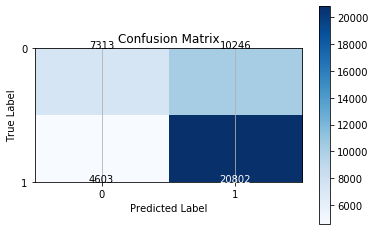

In [91]:
best_rf = RandomForestClassifier(max_depth=35, min_samples_split=0.001, n_estimators=400)

best_rf.fit(X_train, y_train)

rf_y_hat_train2 = best_rf.predict(X_train)
rf_y_hat_test2 = best_rf.predict(X_test)

print("Random Forest score for training set:", round(best_rf.score(X_train, y_train),5))
print("Random Forest score for test set:", round(best_rf.score(X_test, y_test),5))
print("\nClassification report:")
print(classification_report(y_test, rf_y_hat_test2))
plot_cf(y_test, rf_y_hat_test2)

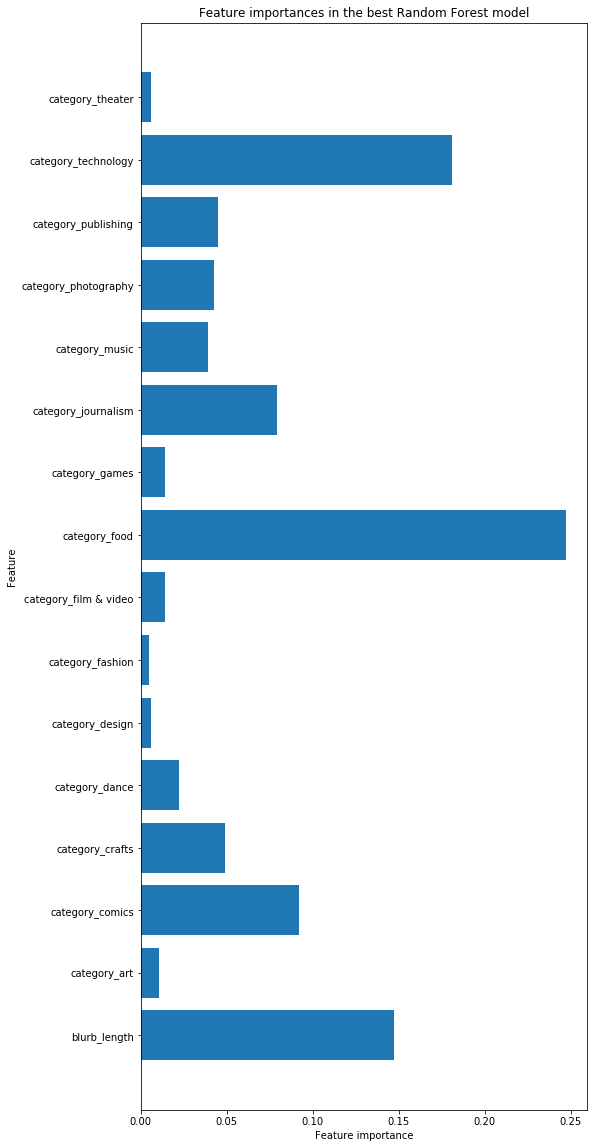

In [92]:
# Plotting feature importance
n_features = X_train.shape[1]
plt.figure(figsize=(8,20))
plt.barh(range(n_features), best_rf.feature_importances_, align='center') 
plt.yticks(np.arange(n_features), X_train.columns.values) 
plt.title("Feature importances in the best Random Forest model")
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

In [93]:
# Dropping columns beginning with 'deadline'
X_filtered = X_log[[c for c in X_log.columns if c[:8] != 'deadline']]

# Dropping columns beginning with 'launch'
X_filtered = X_filtered[[c for c in X_filtered.columns if c[:6] != 'launch']]

X_filtered.head()

,blurb_length,category_art,category_comics,category_crafts,category_dance,category_design,category_fashion,category_film & video,category_food,category_games,category_journalism,category_music,category_photography,category_publishing,category_technology,category_theater
0,-1.966505,-0.341151,-0.206608,-0.184915,-0.132885,-0.202514,-0.244061,-0.397349,-0.290286,3.704885,-0.154694,-0.398479,-0.188797,-0.331816,-0.340360,-0.172772
1,0.666065,-0.341151,-0.206608,-0.184915,-0.132885,-0.202514,-0.244061,-0.397349,-0.290286,-0.269914,-0.154694,2.509542,-0.188797,-0.331816,-0.340360,-0.172772
2,0.478025,-0.341151,-0.206608,-0.184915,-0.132885,-0.202514,-0.244061,-0.397349,3.444881,-0.269914,-0.154694,-0.398479,-0.188797,-0.331816,-0.340360,-0.172772
3,-0.086098,-0.341151,-0.206608,-0.184915,-0.132885,-0.202514,-0.244061,-0.397349,-0.290286,-0.269914,-0.154694,-0.398479,-0.188797,3.013721,-0.340360,-0.172772
4,1.230188,-0.341151,-0.206608,-0.184915,-0.132885,-0.202514,-0.244061,-0.397349,-0.290286,-0.269914,-0.154694,-0.398479,-0.188797,-0.331816,2.938066,-0.172772


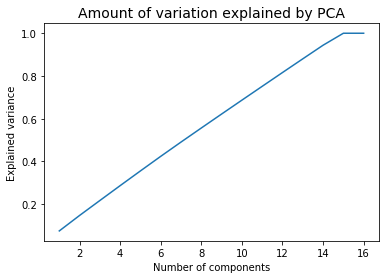

In [94]:
# Conducting PCA
pca = PCA()
principal_comps = pca.fit_transform(X_filtered)
explained_var = np.cumsum(pca.explained_variance_ratio_)

# Plotting the amount of variation explained by PCA with different numbers of components
plt.plot(list(range(1, len(explained_var)+1)), explained_var)
plt.title('Amount of variation explained by PCA', fontsize=14)
plt.xlabel('Number of components')
plt.ylabel('Explained variance');

In [95]:
# Creating a list of PCA column names
pca_columns = []
for i in range(0,16):
    pca_columns.append("PC"+str(i))

# Creating a dataframe of principal components
principal_comps_df = pd.DataFrame(principal_comps, columns=pca_columns)

In [96]:
# Creating a dataframe of principal components
principal_comps_df = pd.DataFrame(principal_comps, columns=pca_columns)

In [97]:
# Adding target (success/fail) to the principal components dataframe
principal_comps_df = pd.concat([principal_comps_df, y_log.reset_index()], axis=1)
principal_comps_df.drop('id', inplace=True, axis=1)
principal_comps_df.head()

,PC0,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,state
0,-2.013719,-0.034561,-0.538133,-0.306763,-1.891346,0.410356,2.990697,-0.835784,-0.383610,0.159055,-0.095043,-0.012460,-0.070052,-0.058462,0.776415,1.531684e-13,1
1,1.643870,-2.023714,-0.638847,-0.328233,-0.296884,-0.366546,-0.099263,-0.332634,0.045705,0.106319,-0.015941,-0.066184,-0.054484,-0.047998,-0.058606,9.428593e-13,0
2,0.408849,0.009678,0.660340,0.438992,0.709598,3.195029,-0.529566,-1.086384,0.119614,0.278505,-0.040940,-0.157637,-0.121972,-0.101823,0.006678,-2.107524e-13,0
3,-0.081760,0.001979,1.774900,2.217103,-0.402899,-1.172993,-0.141635,-0.572648,0.052778,0.169453,-0.028093,-0.099939,-0.083455,-0.072873,0.259235,-4.480740e-13,1
4,0.085498,-0.002602,1.830439,-2.061239,1.339870,-0.645735,0.112436,-0.301286,-0.146799,0.060273,-0.048425,0.016447,-0.018021,-0.008675,-1.086298,2.344668e-13,0


In [106]:
# Dropping columns beginning with 'country'
X_filtered = X_filtered[[c for c in X_filtered.columns if c[:7] != 'country']]

X_filtered.head()

,blurb_length,category_art,category_comics,category_crafts,category_dance,category_design,category_fashion,category_film & video,category_food,category_games,category_journalism,category_music,category_photography,category_publishing,category_technology,category_theater
0,-1.966505,-0.341151,-0.206608,-0.184915,-0.132885,-0.202514,-0.244061,-0.397349,-0.290286,3.704885,-0.154694,-0.398479,-0.188797,-0.331816,-0.340360,-0.172772
1,0.666065,-0.341151,-0.206608,-0.184915,-0.132885,-0.202514,-0.244061,-0.397349,-0.290286,-0.269914,-0.154694,2.509542,-0.188797,-0.331816,-0.340360,-0.172772
2,0.478025,-0.341151,-0.206608,-0.184915,-0.132885,-0.202514,-0.244061,-0.397349,3.444881,-0.269914,-0.154694,-0.398479,-0.188797,-0.331816,-0.340360,-0.172772
3,-0.086098,-0.341151,-0.206608,-0.184915,-0.132885,-0.202514,-0.244061,-0.397349,-0.290286,-0.269914,-0.154694,-0.398479,-0.188797,3.013721,-0.340360,-0.172772
4,1.230188,-0.341151,-0.206608,-0.184915,-0.132885,-0.202514,-0.244061,-0.397349,-0.290286,-0.269914,-0.154694,-0.398479,-0.188797,-0.331816,2.938066,-0.172772


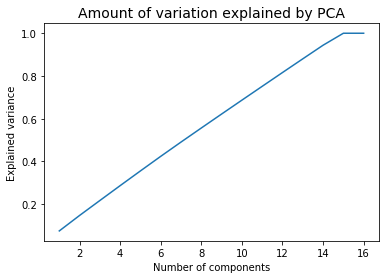

In [107]:
# Conducting PCA
pca = PCA()
principal_comps = pca.fit_transform(X_filtered)
explained_var = np.cumsum(pca.explained_variance_ratio_)

# Plotting the amount of variation explained by PCA with different numbers of components
plt.plot(list(range(1, len(explained_var)+1)), explained_var)
plt.title('Amount of variation explained by PCA', fontsize=14)
plt.xlabel('Number of components')
plt.ylabel('Explained variance');

## Conclusions and recommendations

### Choosing a final model

In [108]:
# Extracting weighted average precision, recall and test scores for each best model
# Logistic regression
lr_test_precision, lr_test_recall, lr_test_f1score, lr_test_support = precision_recall_fscore_support(y_test, lr_y_hat_test2, average='weighted')
lr_train_precision, lr_train_recall, lr_train_f1score, lr_train_support = precision_recall_fscore_support(y_train, lr_y_hat_train2, average='weighted')
# Random Forest
rf_test_precision, rf_test_recall, rf_test_f1score, rf_test_support = precision_recall_fscore_support(y_test, rf_y_hat_test2, average='weighted')
rf_train_precision, rf_train_recall, rf_train_f1score, rf_train_support = precision_recall_fscore_support(y_train, rf_y_hat_train2, average='weighted')

In [109]:
# Logistic regression results
lr_results = {'Precision':[lr_train_precision, lr_test_precision], 'Recall':[lr_train_recall, lr_test_recall], 'F1_score': [lr_train_f1score, lr_test_f1score]}
lr_results = pd.DataFrame(lr_results, index=['Train', 'Test'])
print("Best logistic regression results (Model 4):")
lr_results

Best logistic regression results (Model 4):


,Precision,Recall,F1_score
Train,0.645151,0.652382,0.635019
Test,0.646128,0.653361,0.635787


In [110]:
# Random Forest results
rf_results = {'Precision':[rf_train_precision, rf_test_precision], 'Recall':[rf_train_recall, rf_test_recall], 'F1_score': [rf_train_f1score, rf_test_f1score]}
rf_results = pd.DataFrame(rf_results, index=['Train', 'Test'])
print("Best Random Forest results (Model 5):")
rf_results

Best Random Forest results (Model 5):


,Precision,Recall,F1_score
Train,0.648567,0.655614,0.640024
Test,0.646993,0.654385,0.638575


### Final model evaluation and interpretation

In [111]:
r_cf = confusion_matrix(y_test, rf_y_hat_test2)
print("Evaluation of the final model:")
print("\nIf the true value is failure, what proportion does the model correctly predict as a failure? \n(True negative rate/specificity):\n", round(r_cf[0][0]/sum(r_cf[0]),4))
print("If the true value is success, what proportion does the model correctly predict as a success? \n(True positive rate/recall/sensitivity):\n", round(r_cf[1][1]/sum(r_cf[1]),4))
print("\nIf the model predicts a failure, what proportion are actually failures? \n(Negative prediction value):\n", round(r_cf[0][0]/sum(r_cf[:,0]),4))
print("If the model predicts a success, what proportion are actually successes? \n(Positive prediction value/precision):\n", round(r_cf[1][1]/sum(r_cf[:,1]),4))

Evaluation of the final model:

If the true value is failure, what proportion does the model correctly predict as a failure? 
(True negative rate/specificity):
 0.4165
If the true value is success, what proportion does the model correctly predict as a success? 
(True positive rate/recall/sensitivity):
 0.8188

If the model predicts a failure, what proportion are actually failures? 
(Negative prediction value):
 0.6137
If the model predicts a success, what proportion are actually successes? 
(Positive prediction value/precision):
 0.67
